# Task
i need to make a model to predict the performance of the company. Do the pre processing and necessary visualization to understand the dataset and deal with missing values and the 0 values

Here is all the data you need:
"dataset2010-24.xlsx"

## Data loading

### Subtask:
Load the dataset from the provided Excel file.


**Reasoning**:
Load the dataset from the provided Excel file into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

df = pd.read_excel('/content/dataset2010-24.xlsx')
display(df.head())

Capitaline Code Company Name                     Sector           Industry  \
0           23450   20 Microns  Mining & Mineral products  Mining / Minerals   
1           23450   20 Microns  Mining & Mineral products  Mining / Minerals   
2           23450   20 Microns  Mining & Mineral products  Mining / Minerals   
3           23450   20 Microns  Mining & Mineral products  Mining / Minerals   
4           23450   20 Microns  Mining & Mineral products  Mining / Minerals   

   Financial Year End NSE Symbol  BSE Code Listing Status(MCX) Company Type  \
0                 3.0  20MICRONS  533022.0              Active       Public   
1                 3.0  20MICRONS  533022.0              Active       Public   
2                 3.0  20MICRONS  533022.0              Active       Public   
3                 3.0  20MICRONS  533022.0              Active       Public   
4                 3.0  20MICRONS  533022.0              Active       Public   

   Year End  ...  EPS (Annualised) (Adjusted) (Unit Curr)  ROCE (%).1  \
0  201003.0  ...                                 2.465641       15.52   
1  201403.0  ...                                 0.040000        9.72   
2  202003.0  ...                                 7.080000       19.85   
3  201503.0  ...                                 0.000000        8.50   
4  201803.0  ...                                 4.500000       17.25   

   Price to Book Value ( P/BV)  Price Earning (P/E)  EV/EBIDTA  \
0                         1.33                 7.86       5.80   
1                         1.43               783.75       8.21   
2                         0.52                 3.63       2.96   
3                         1.75                 0.00       8.67   
4                         1.30                10.86       5.44   

   Market Cap/Sales  Book Value  Cash Flow From Operating Activities  \
0              0.31       29.03                                 3.29   
1              0.35       22.00                                23.12   
2              0.19       49.14                                40.26   
3              0.37       20.60                                24.45   
4              0.44       37.63                                49.86   

   Total Income  Gross Profit  
0        180.87         14.95  
1        304.27         10.16  
2        496.78         46.33  
3        321.79          4.82  
4        389.44         32.90  

[5 rows x 39 columns]

## Data exploration

### Subtask:
Explore the dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, and missing values.



In [ ]:
# Examine the shape of the data
print("Shape of the DataFrame:", df.shape)

# Identify the data types of columns
print("\nData types of columns:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())

# Check for missing values
print("\nNumber of missing values in each column:\n", df.isnull().sum())

Shape of the DataFrame: (76254, 39)

Data types of columns:
 Capitaline Code                             object
Company Name                                object
Sector                                      object
Industry                                    object
Financial Year End                         float64
NSE Symbol                                  object
BSE Code                                   float64
Listing Status(MCX)                         object
Company Type                                object
Year End                                   float64
Year                                       float64
Net Working Capital ( Incl. Def. Tax)      float64
Debt-Equity Ratio                          float64
Long Term Debt-Equity Ratio                float64
Current Ratio                              float64
Interest Cover Ratio                       float64
ROCE (%)                                   float64
PBIDTM (%)                                 float64
PBITM (%)            

**Reasoning**:
Visualize the distribution of numerical variables using histograms and box plots to identify potential outliers.



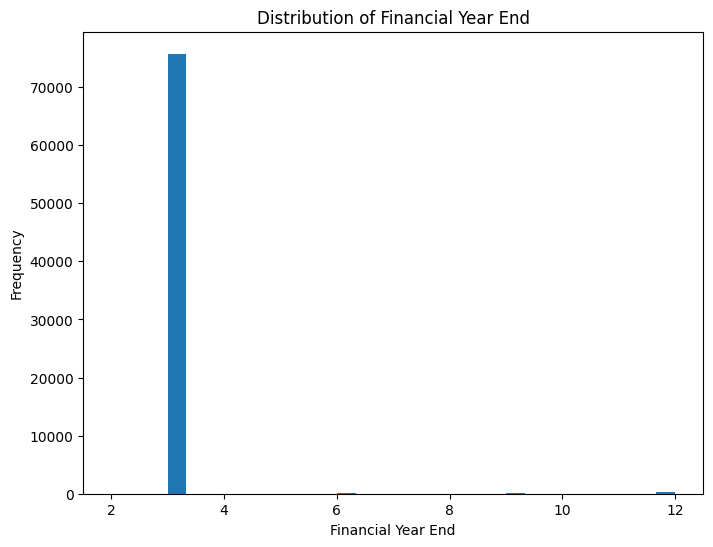

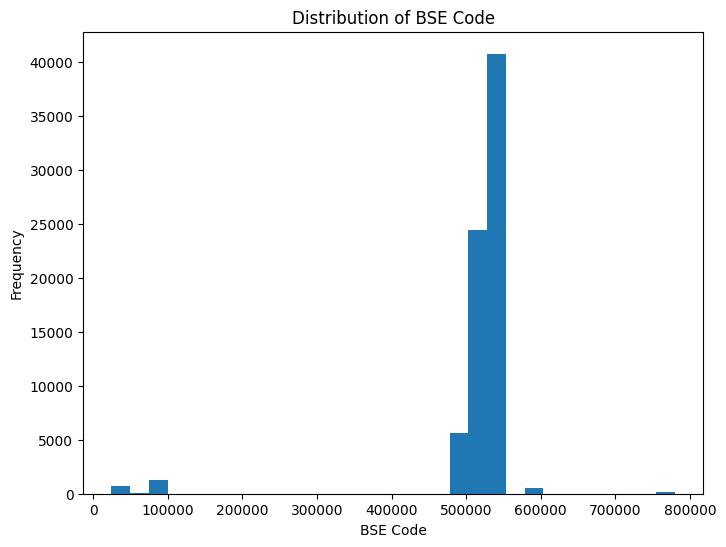

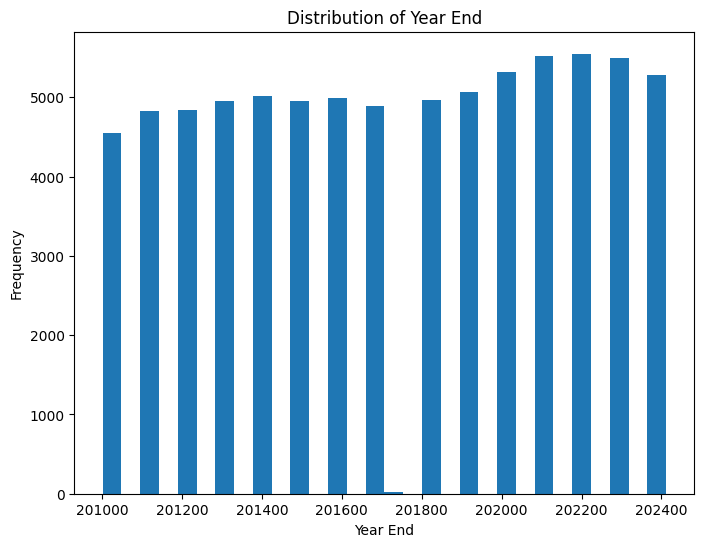

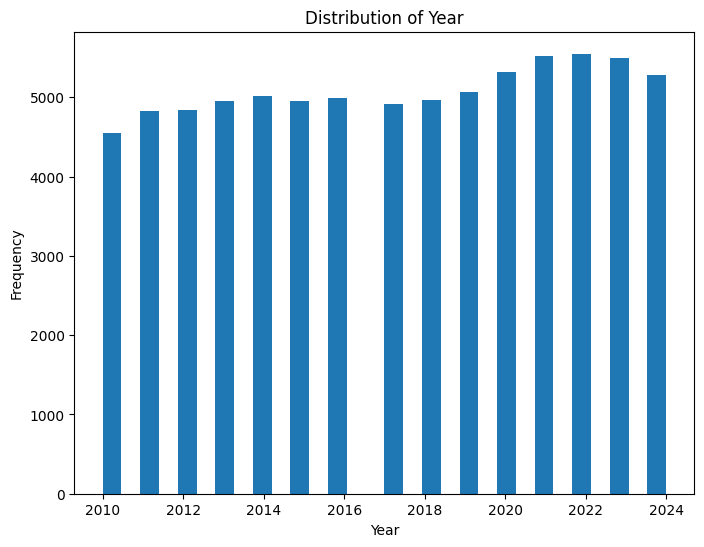

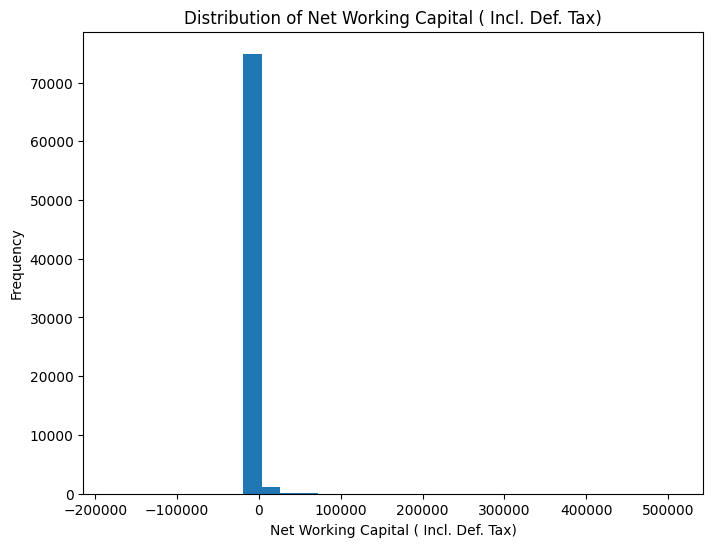

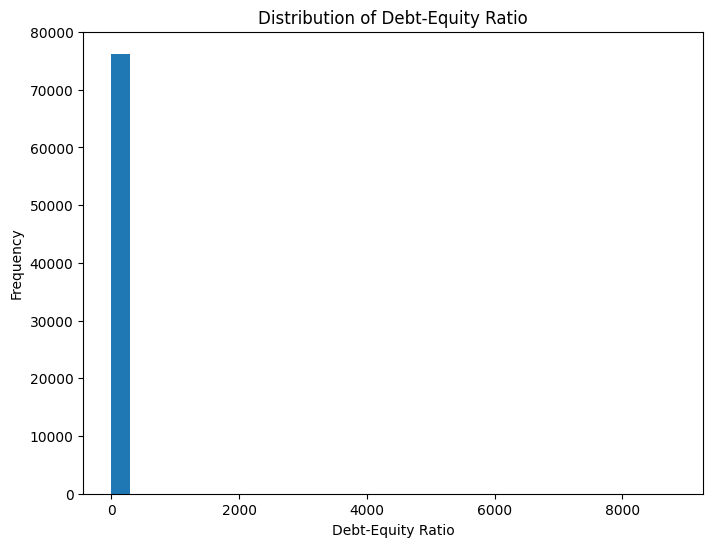

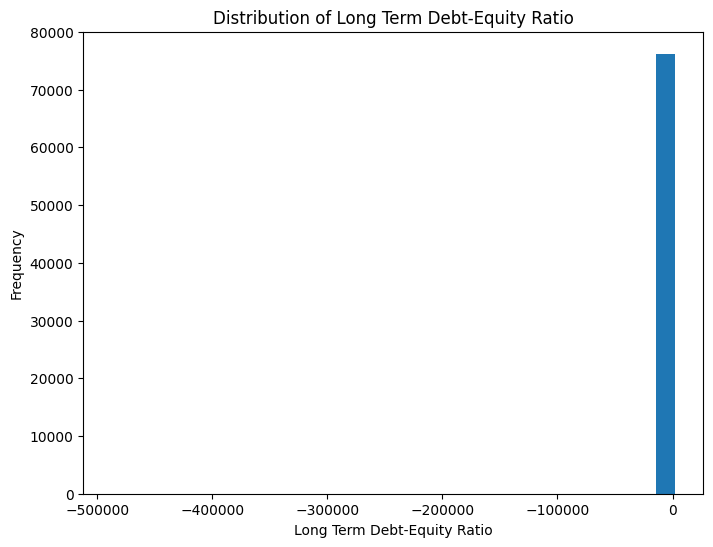

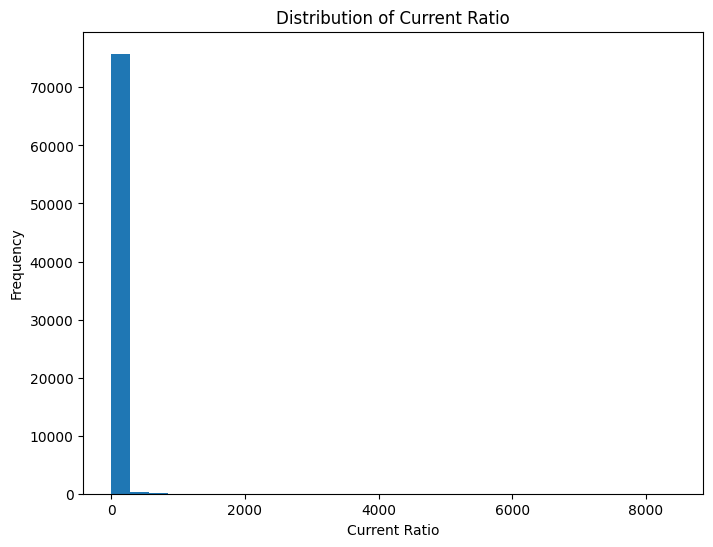

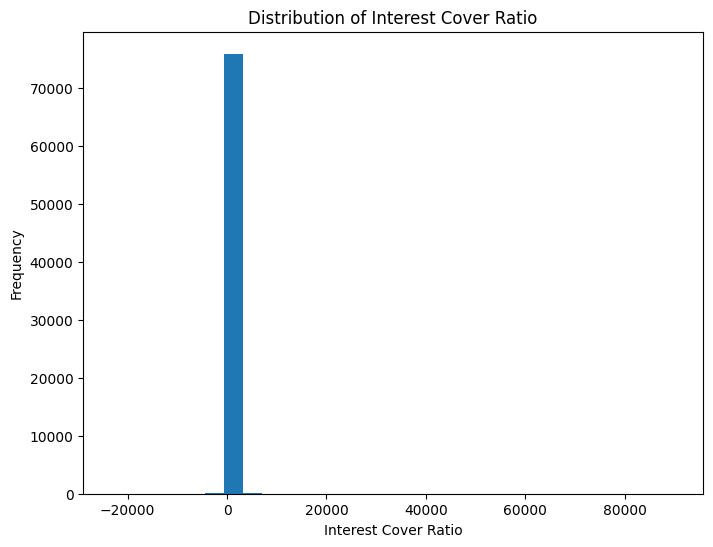

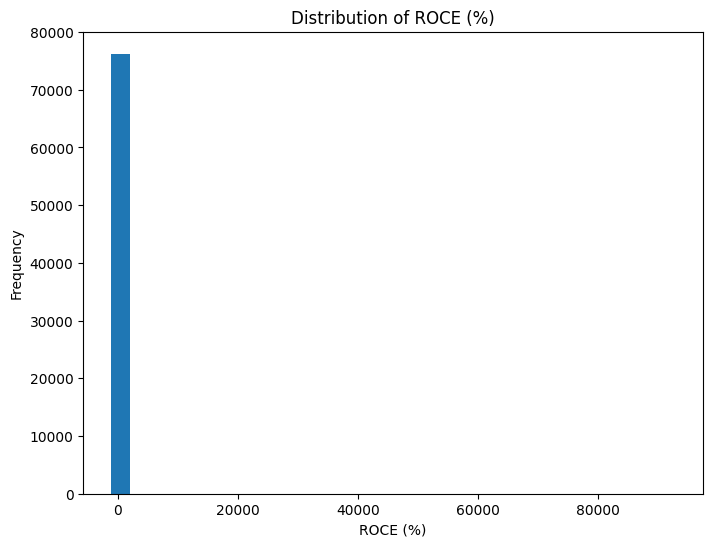

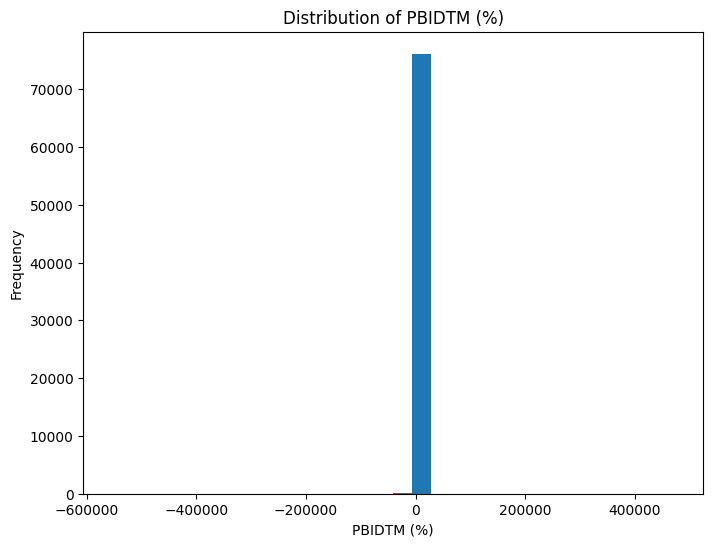

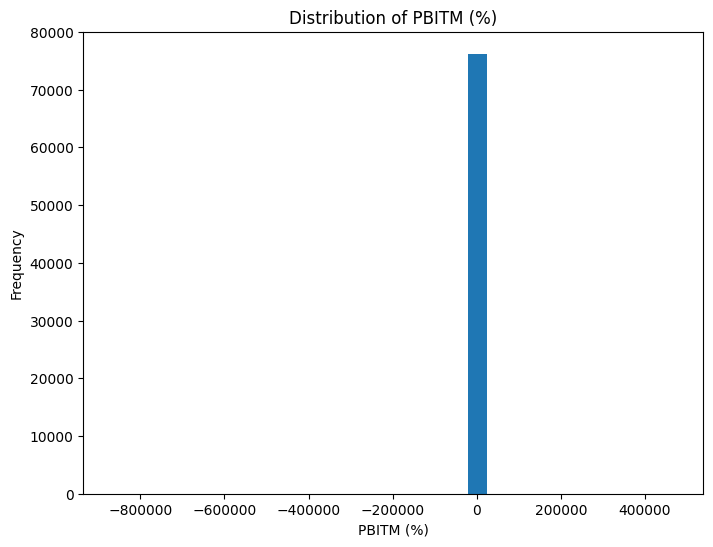

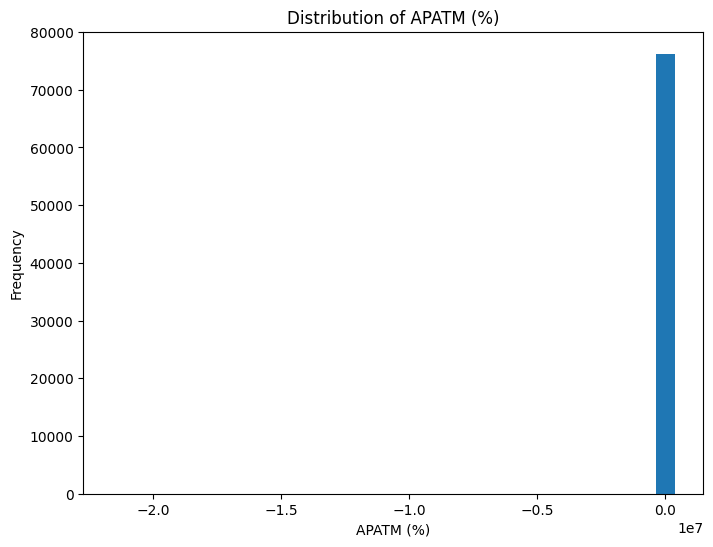

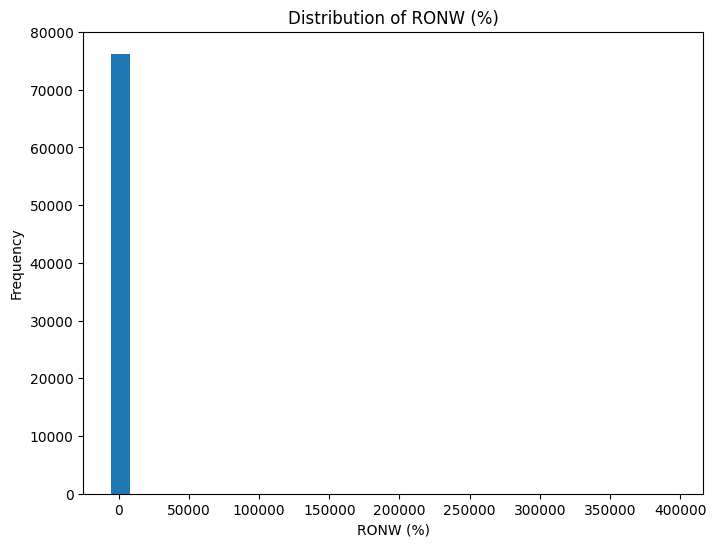

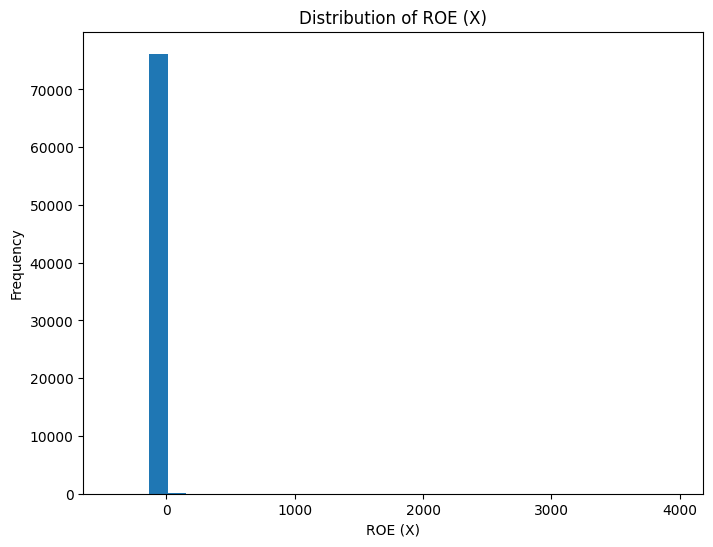

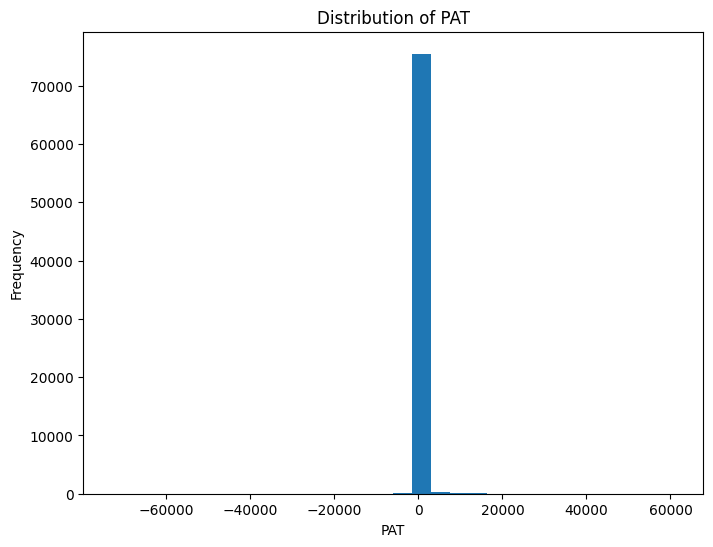

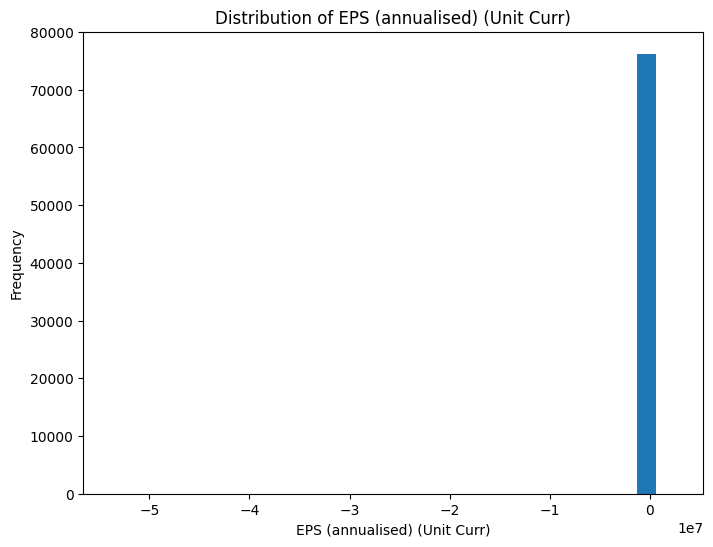

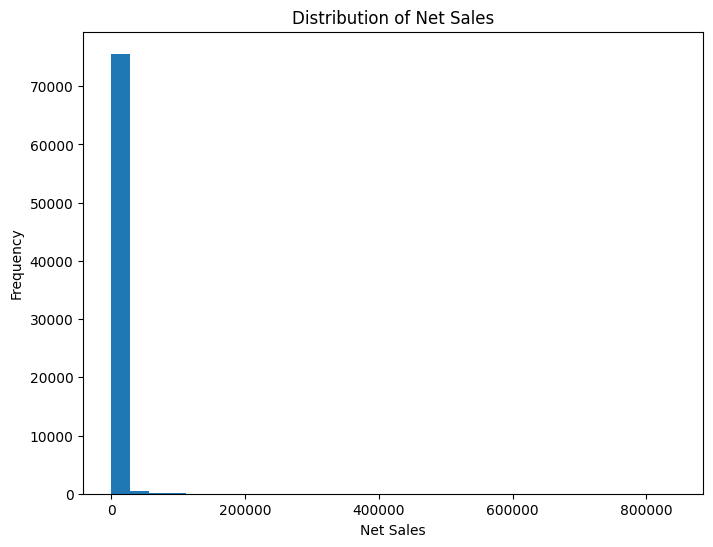

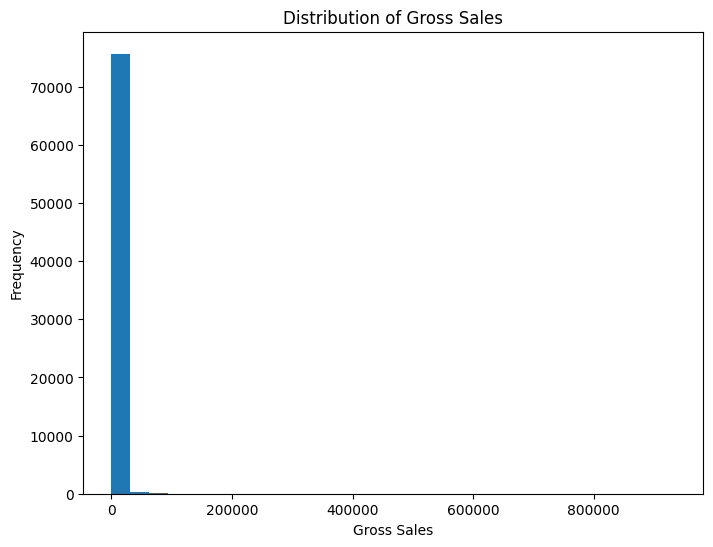

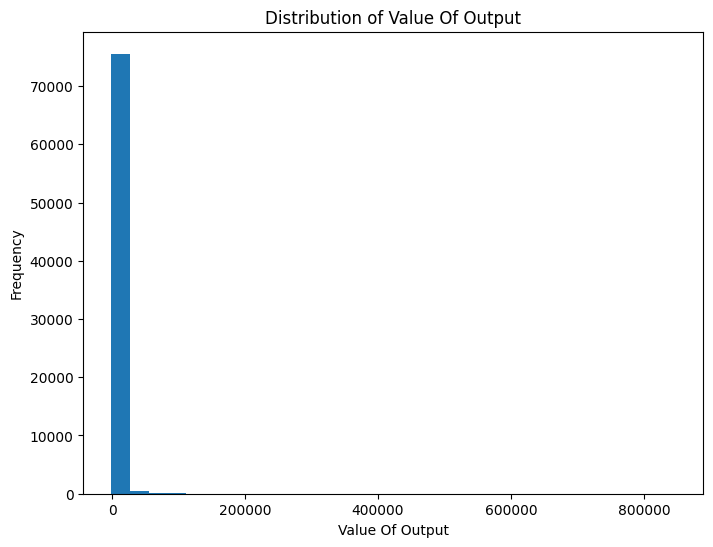

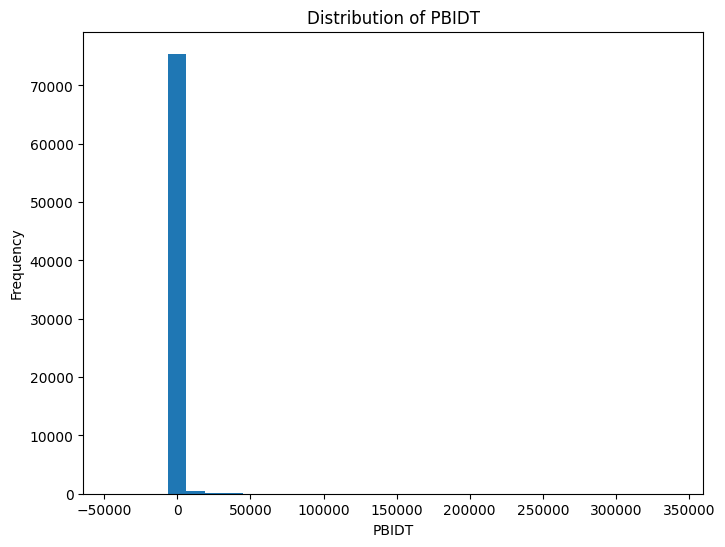

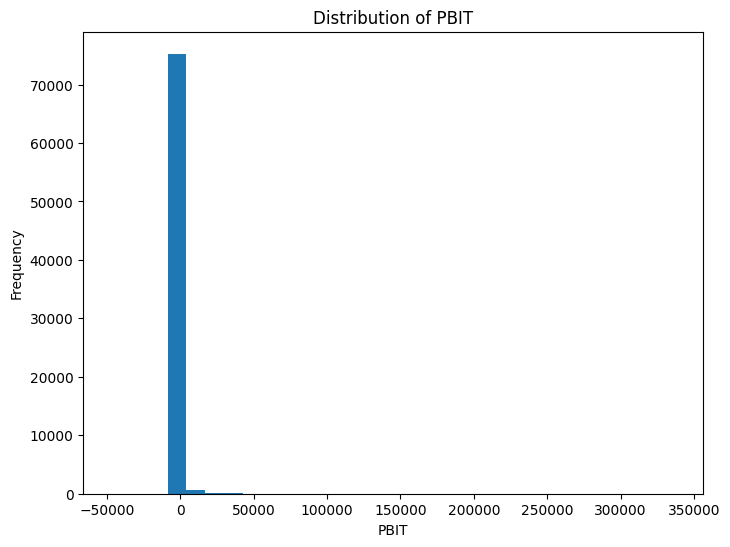

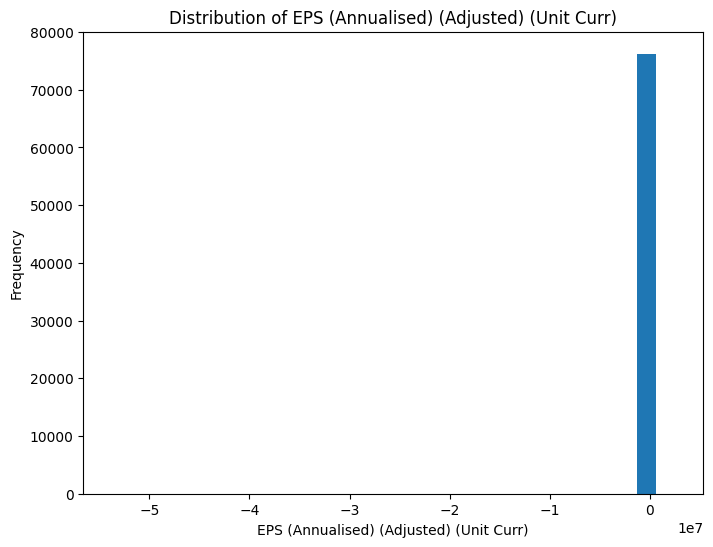

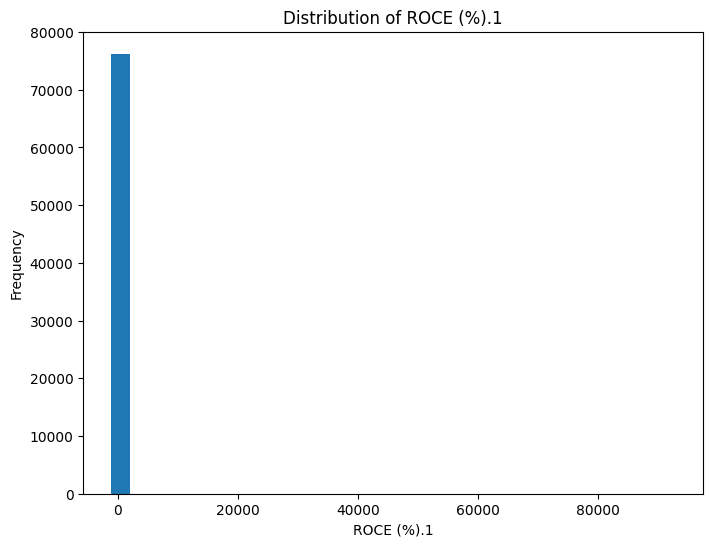

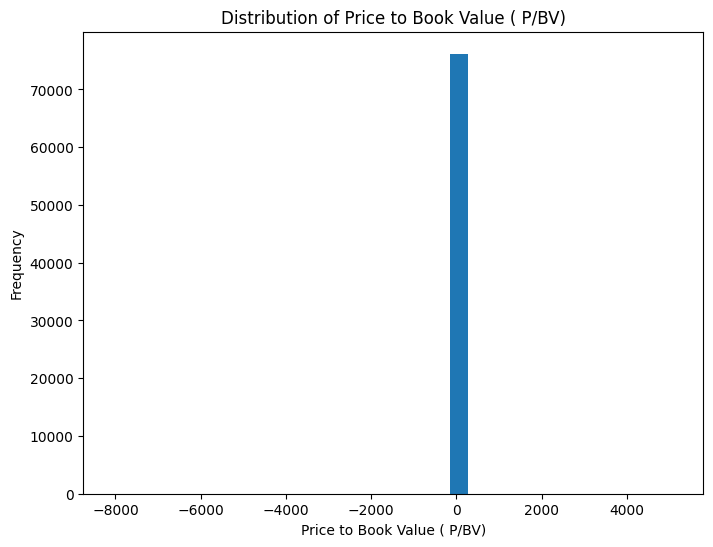

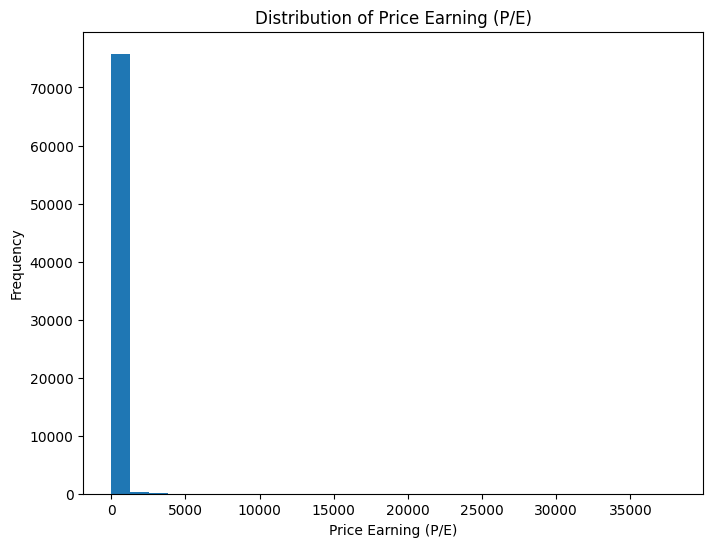

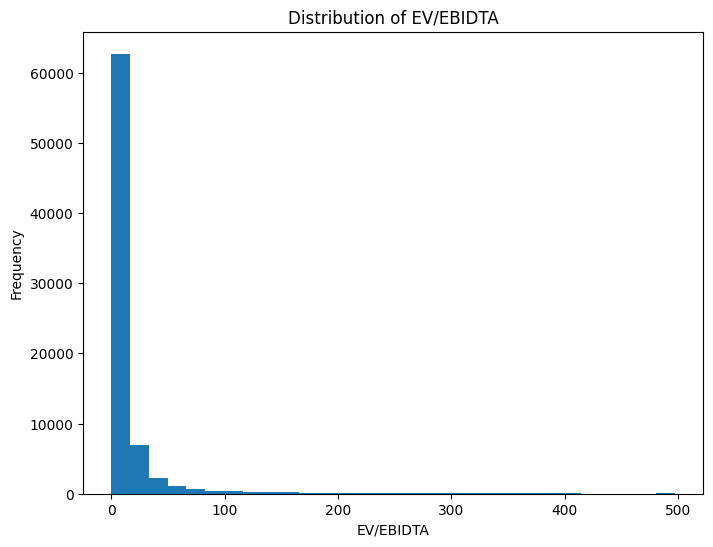

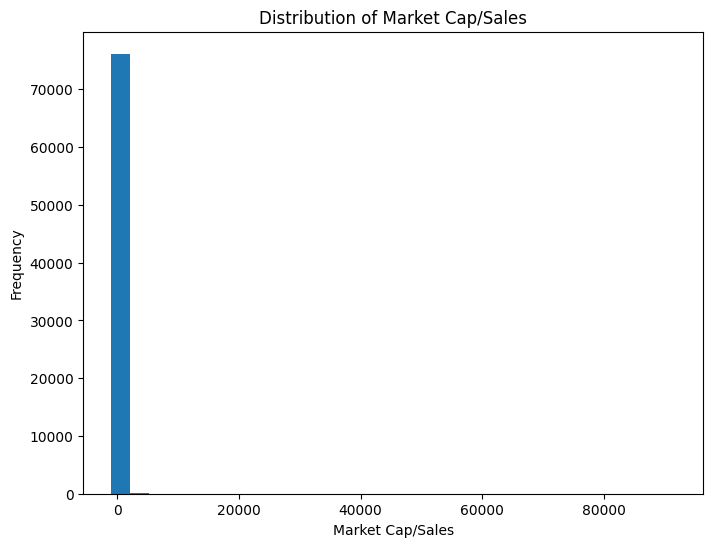

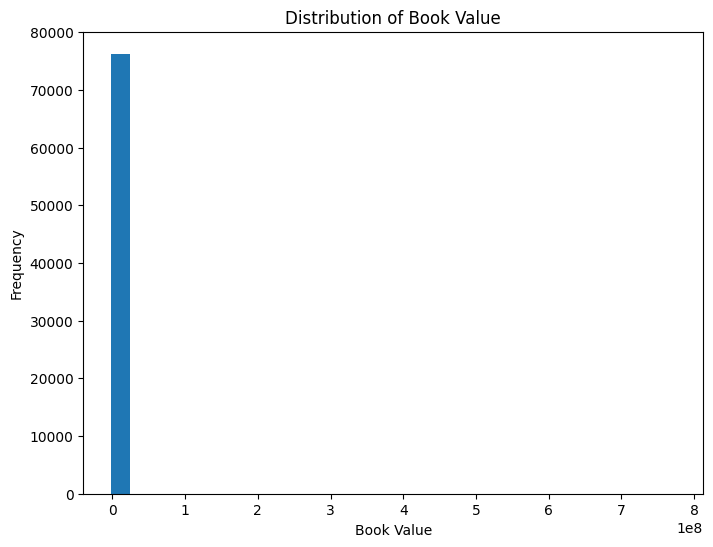

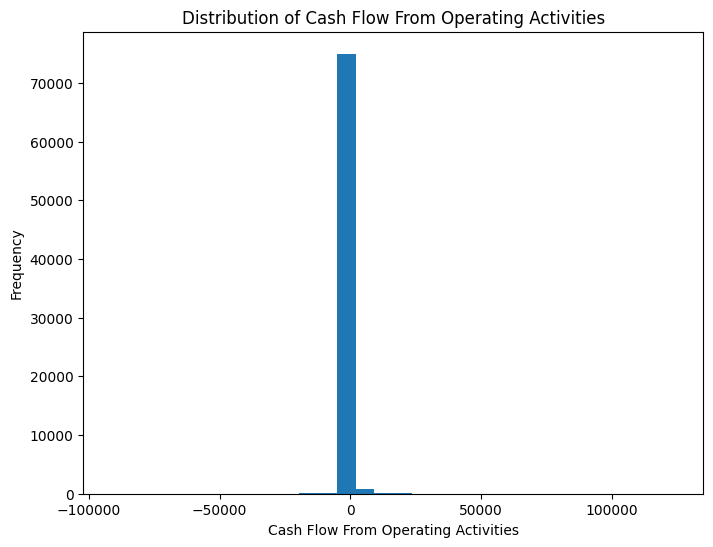

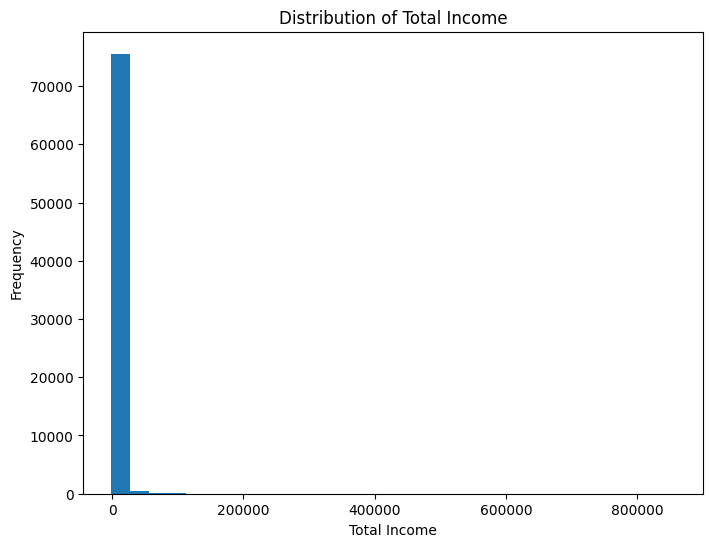

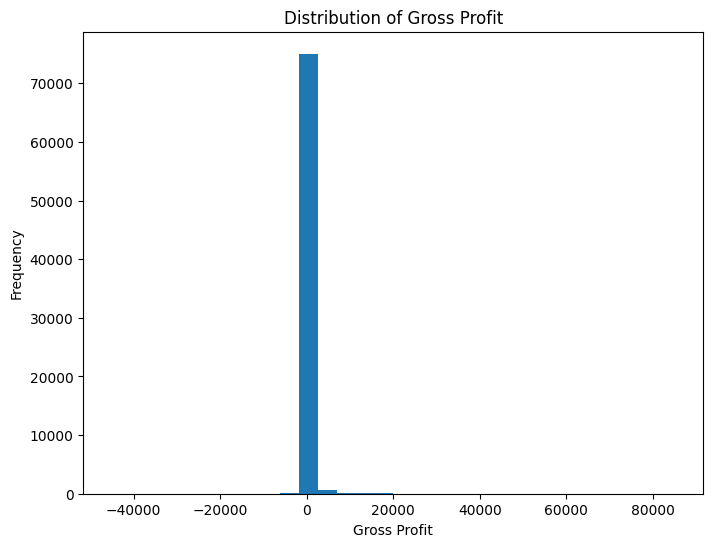

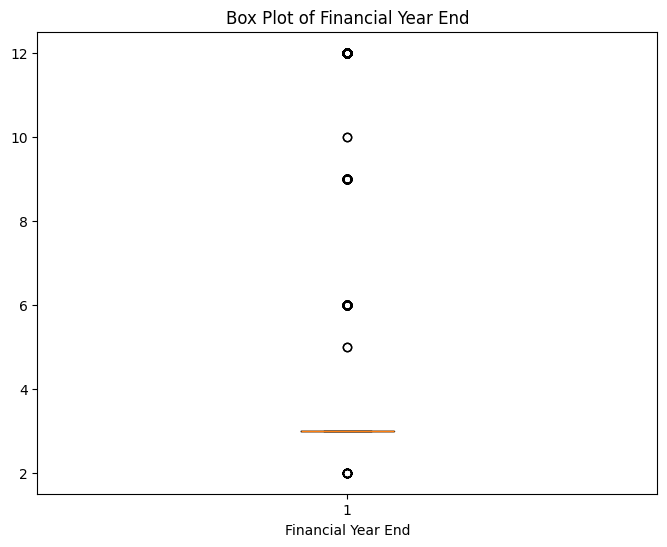

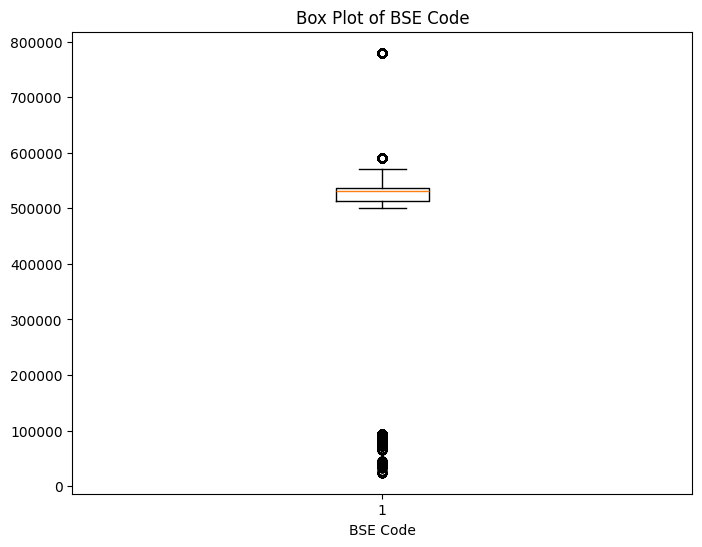

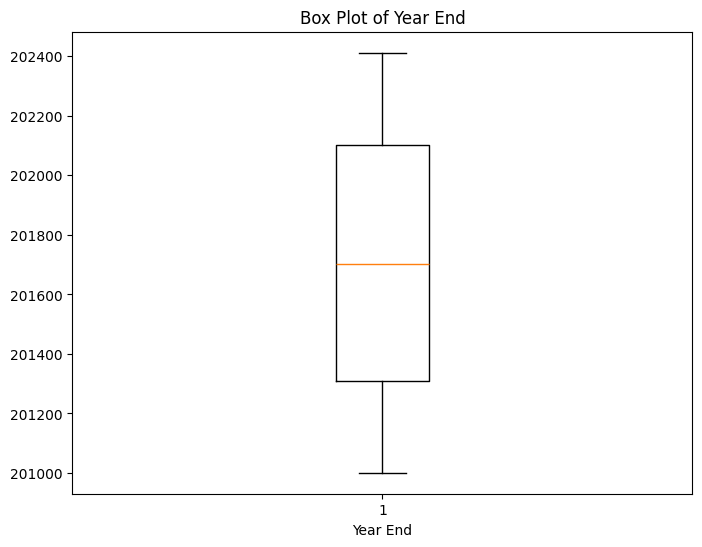

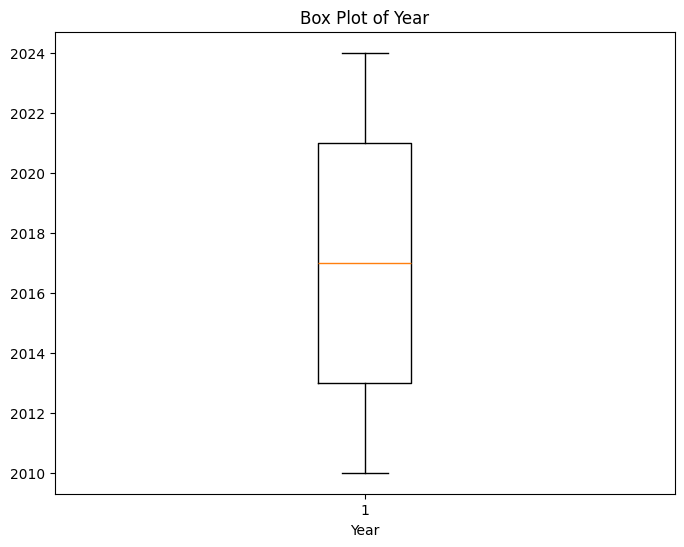

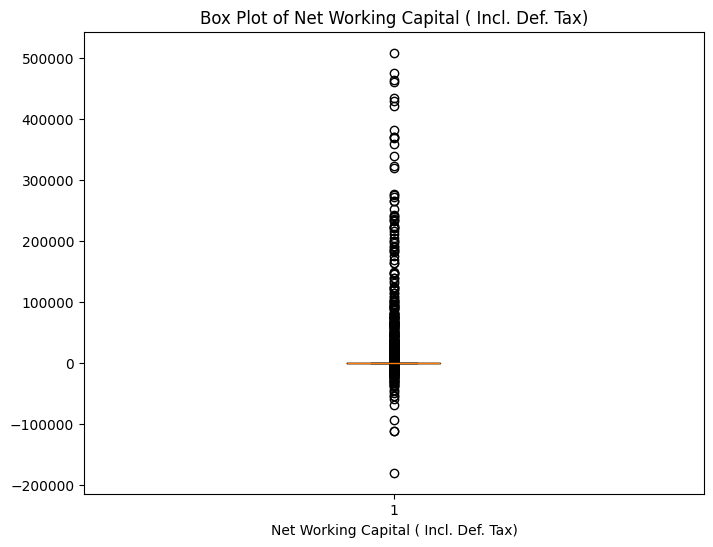

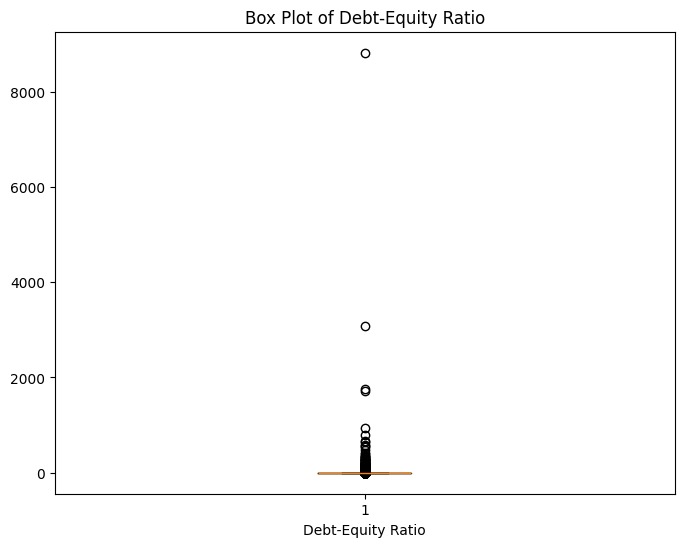

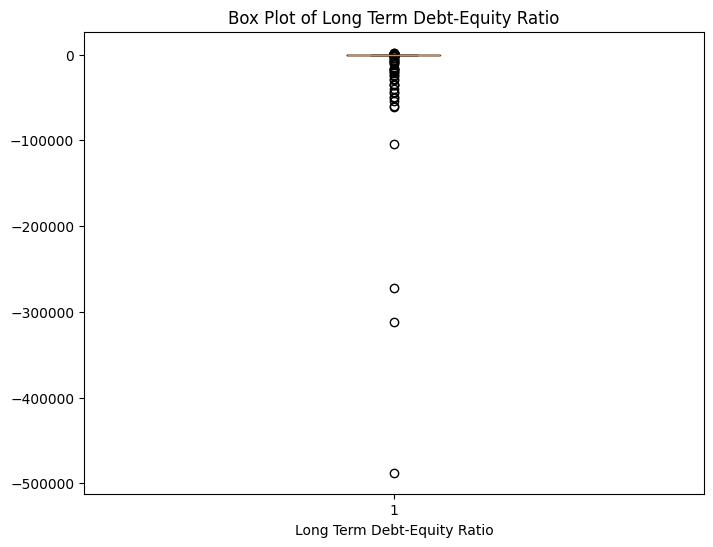

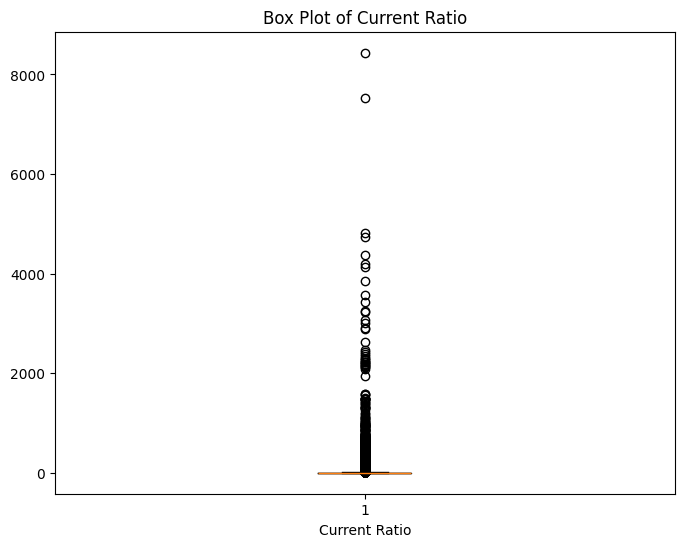

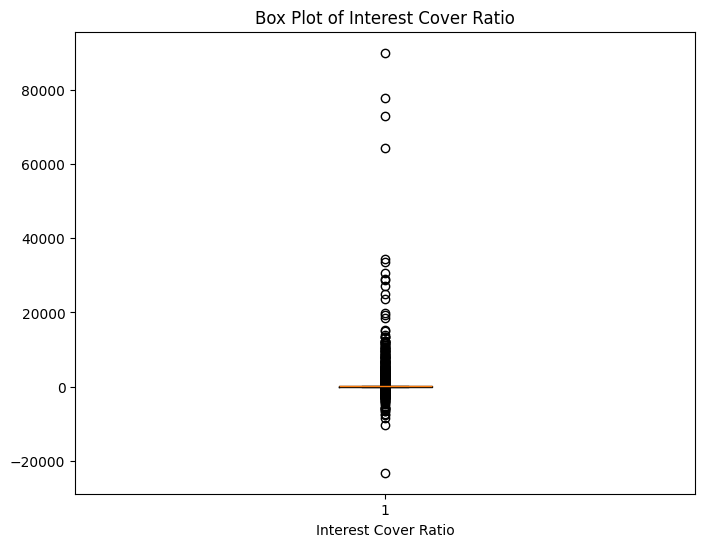

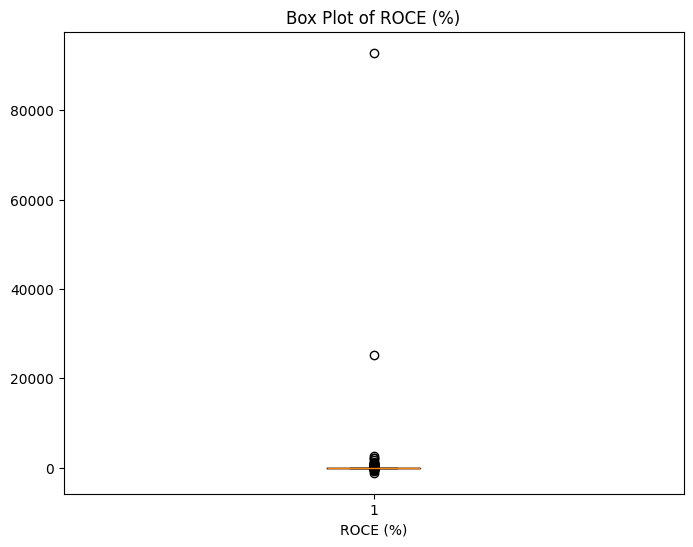

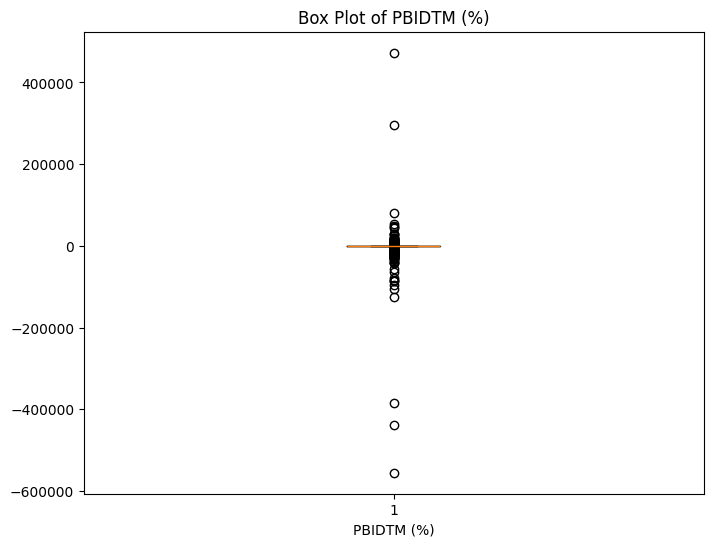

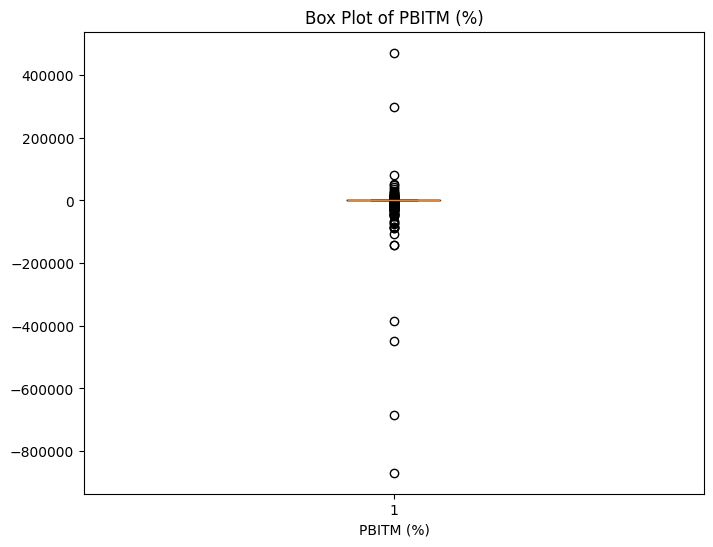

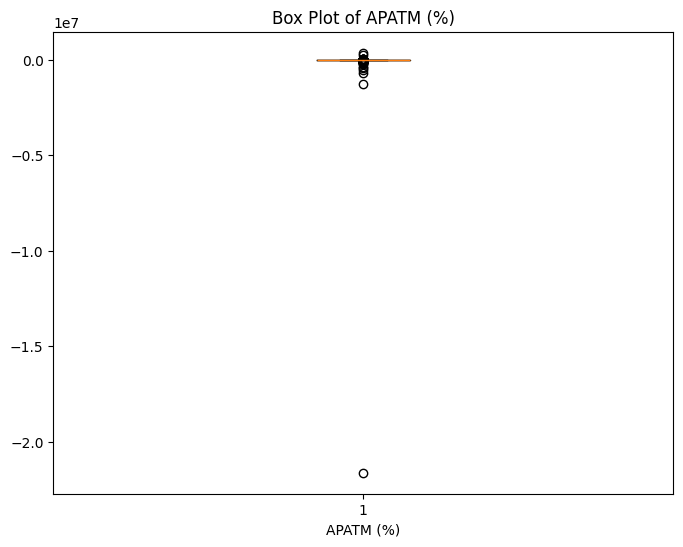

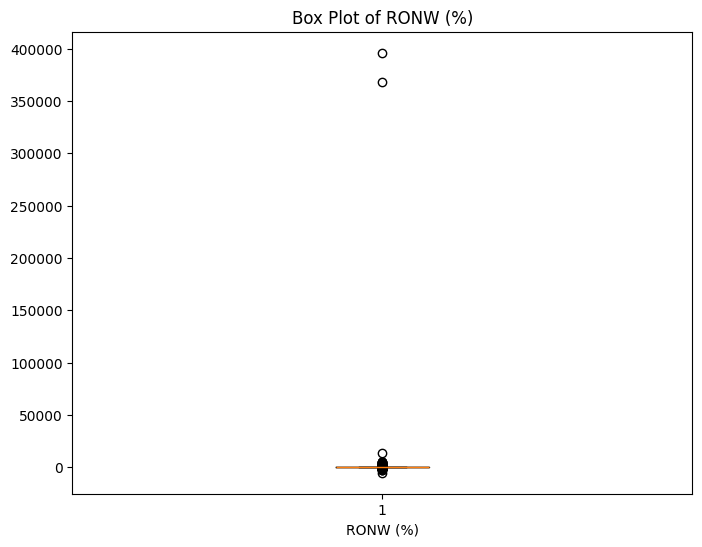

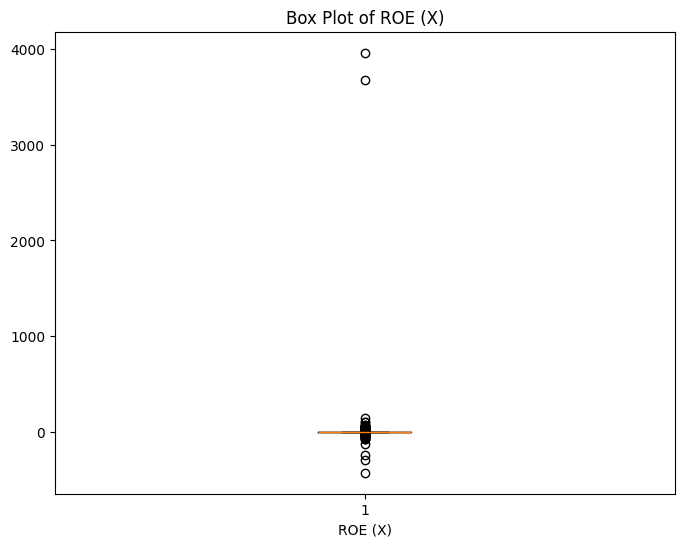

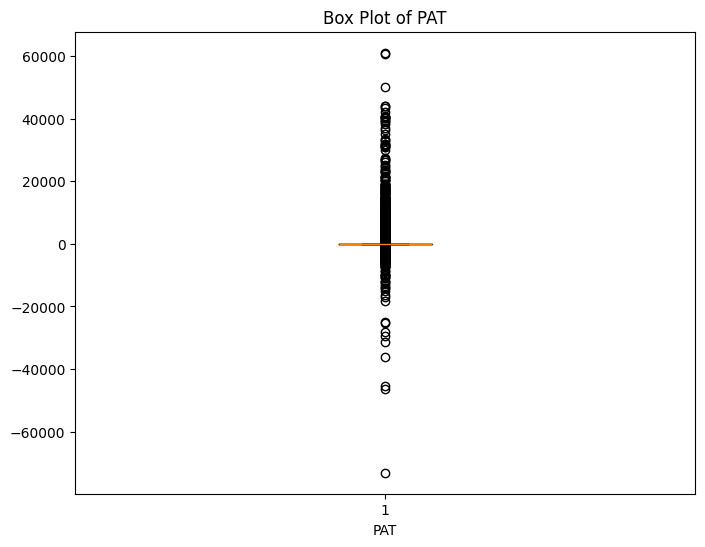

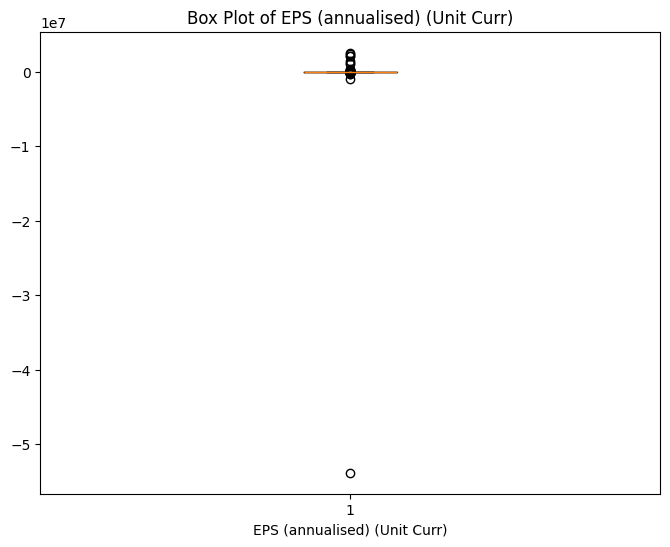

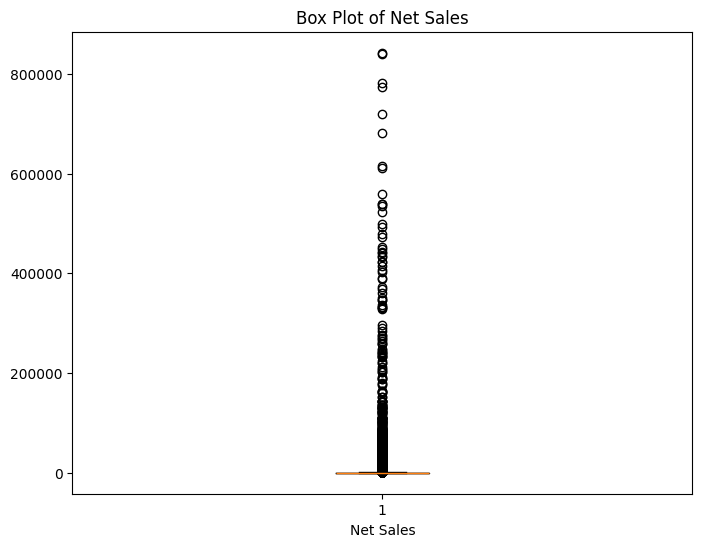

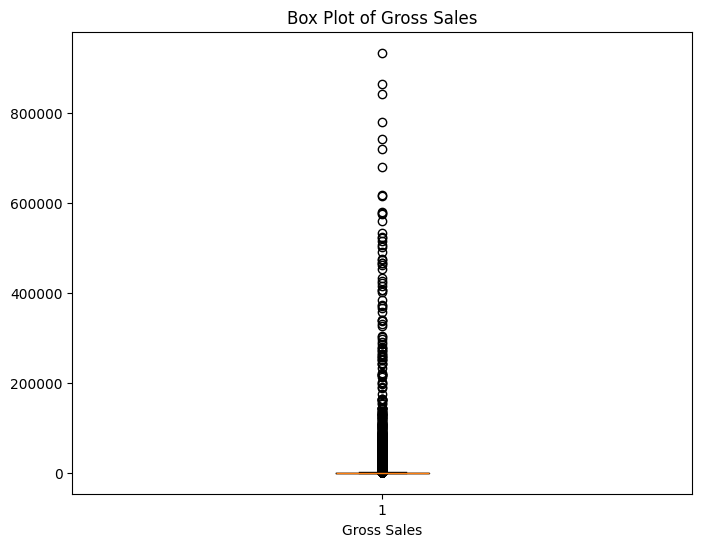

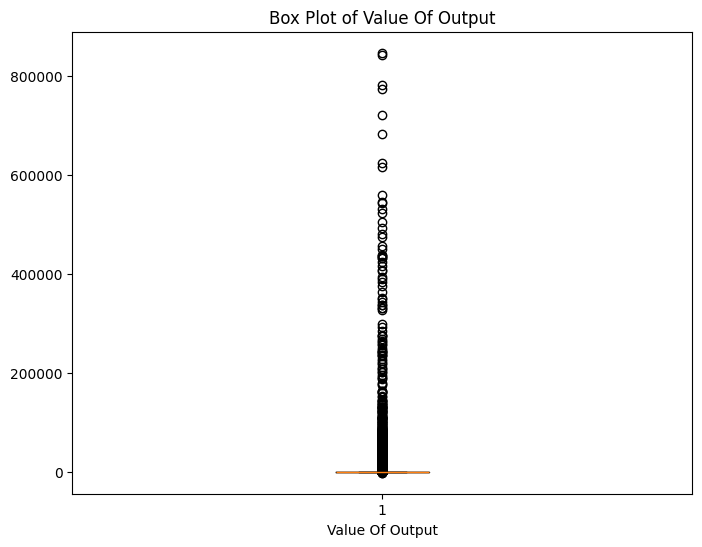

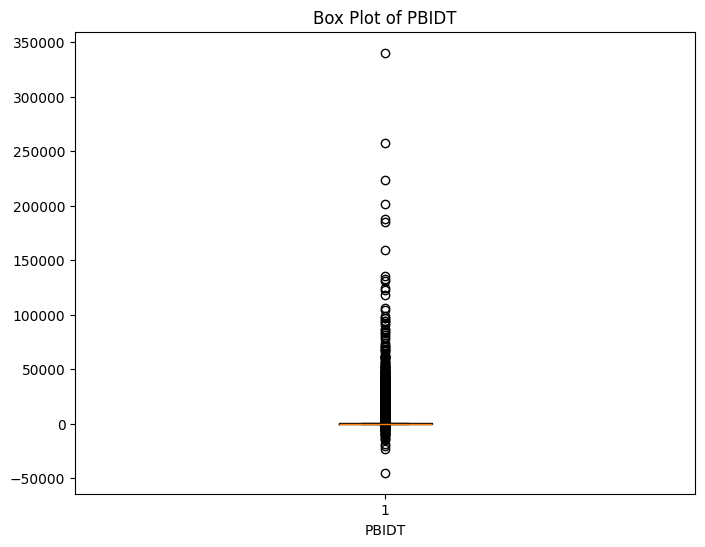

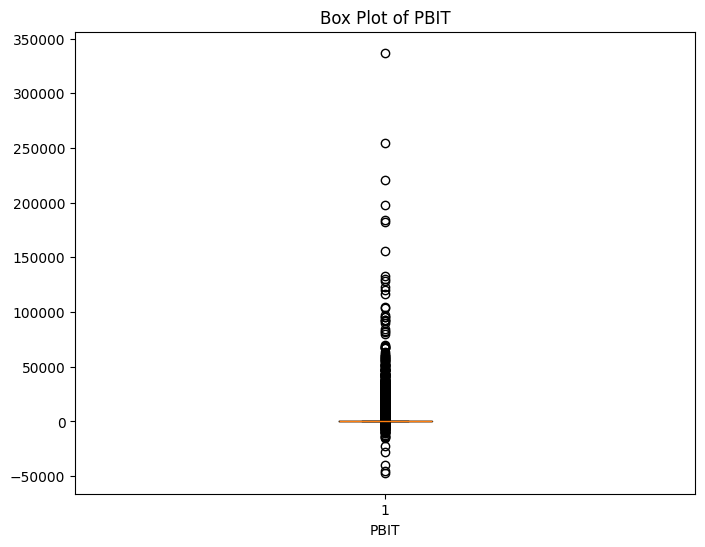

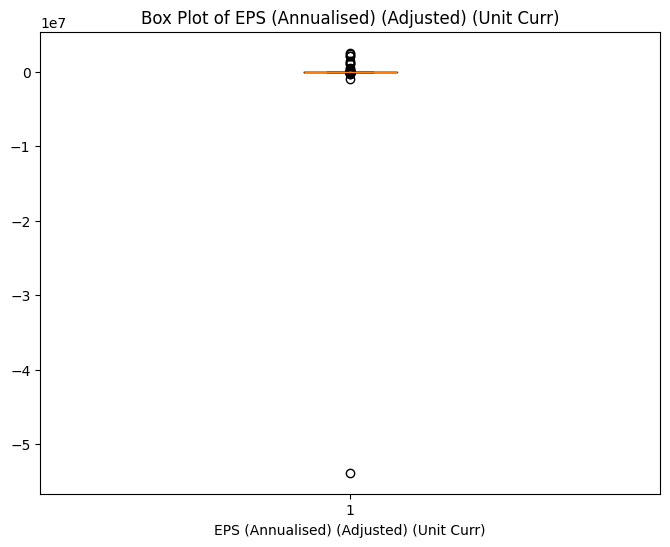

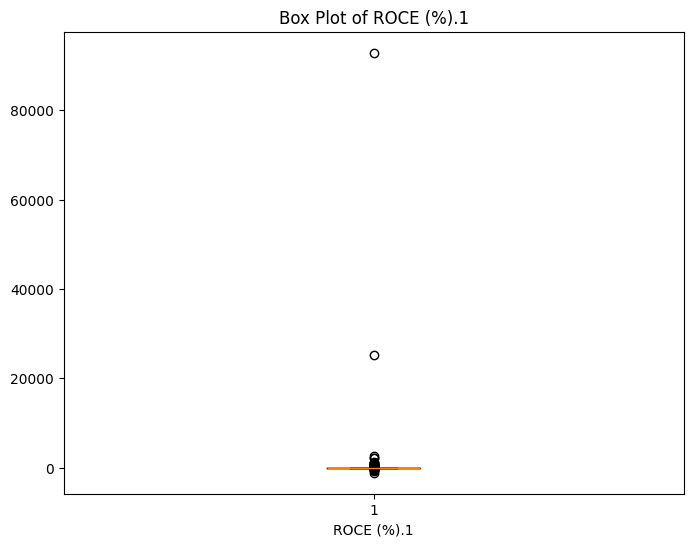

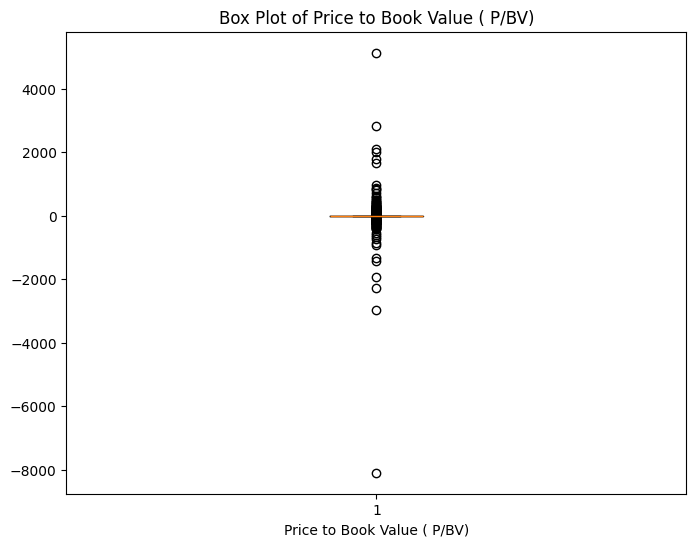

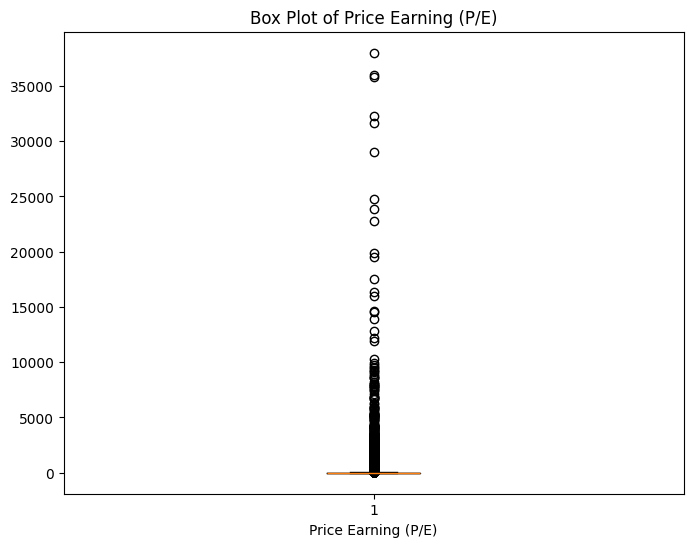

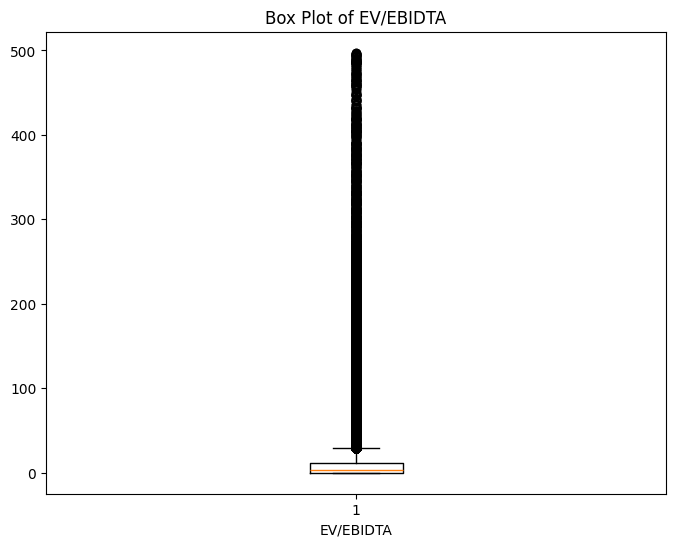

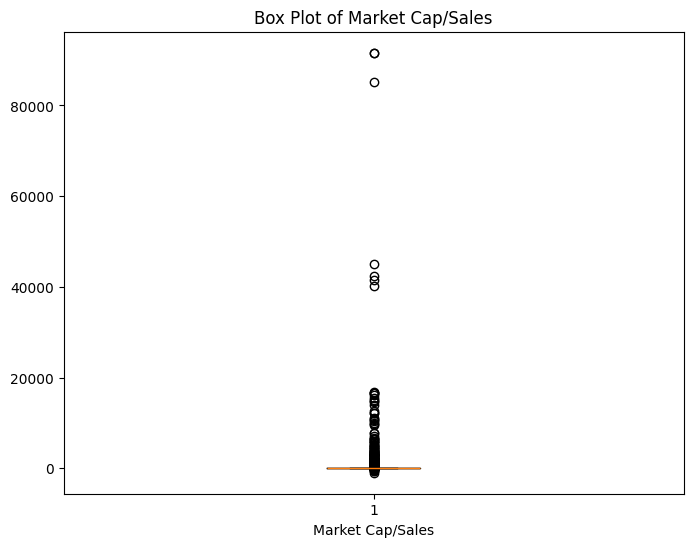

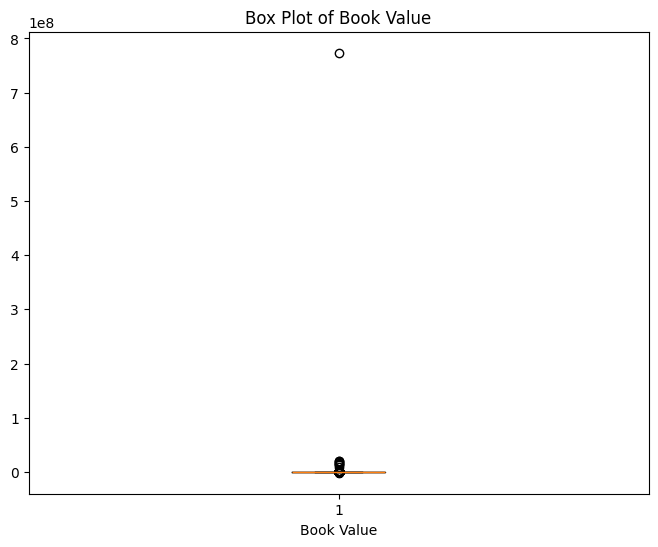

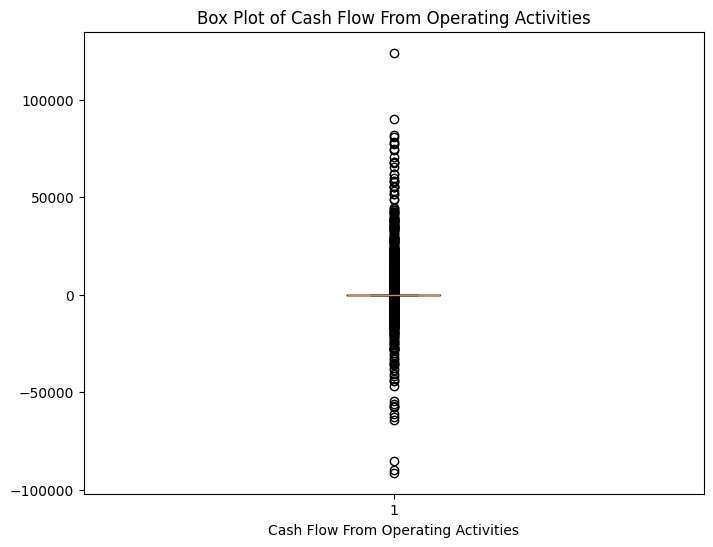

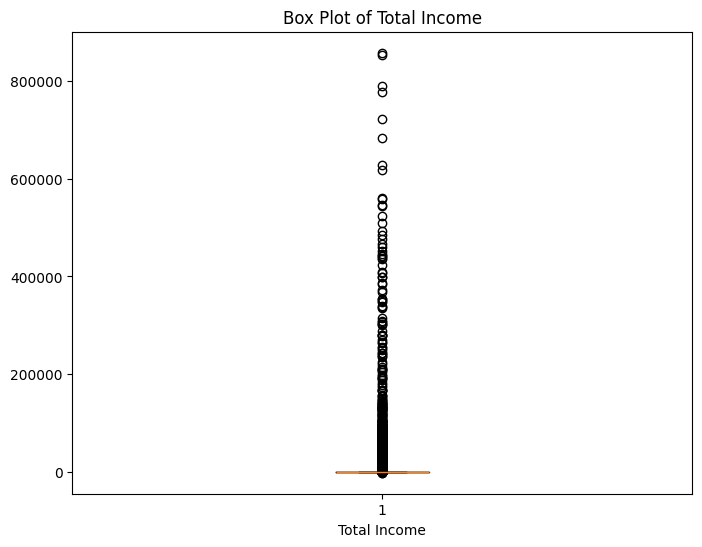

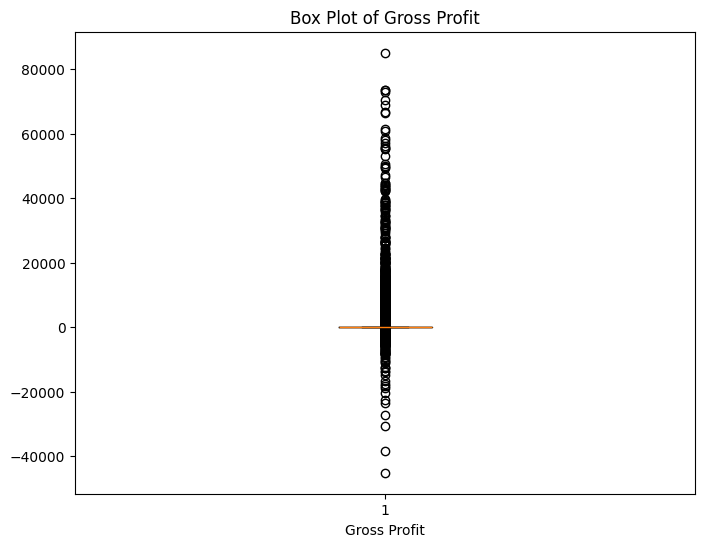

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=['number']).columns

# Create histograms for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=30)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {col}")
  plt.show()

# Create box plots for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[col].dropna())  # Drop NaN values for boxplot
  plt.xlabel(col)
  plt.title(f"Box Plot of {col}")
  plt.show()

**Reasoning**:
Calculate the correlation matrix to understand the relationships between different features.



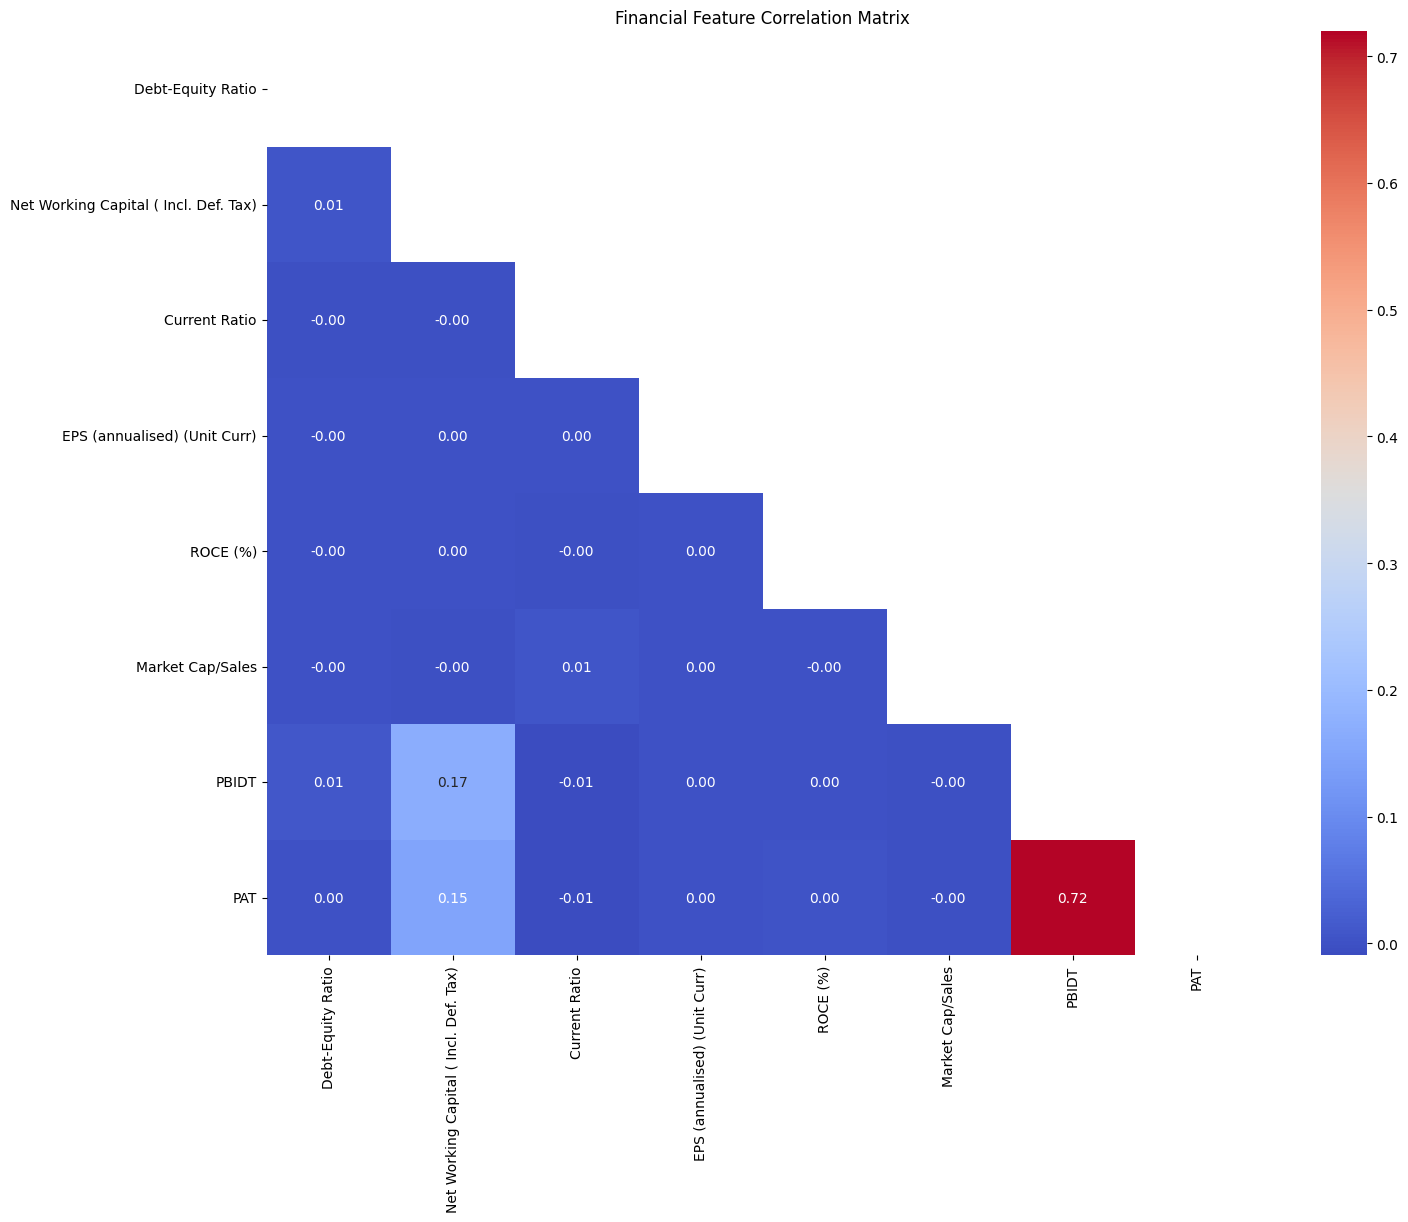

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
FINANCIAL_FEATURES = [
    'Debt-Equity Ratio', 'Net Working Capital ( Incl. Def. Tax)',
    'Current Ratio', 'EPS (annualised) (Unit Curr)', 'ROCE (%)',
    'Market Cap/Sales', 'PBIDT', 'PAT'
]
corr_matrix = df[FINANCIAL_FEATURES].corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            mask=np.triu(np.ones_like(corr_matrix)))
plt.title('Financial Feature Correlation Matrix')
plt.show()

**Reasoning**:
The error indicates that the correlation matrix calculation is failing because some columns contain non-numerical data. Therefore, we need to select only numerical columns for the calculation.



## Data cleaning

### Subtask:
Clean the data by handling missing values and zero values.


**Reasoning**:
Identify columns with missing values and handle them using imputation techniques.



In [ ]:
# Identify columns with missing values
missing_values_count = df.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index.tolist()

# Handle missing values for numerical columns
for column in columns_with_missing_values:
  if pd.api.types.is_numeric_dtype(df[column]):
    df[column] = df[column].fillna(df[column].median())

# Handle missing values for categorical columns (replace with most frequent)
for column in columns_with_missing_values:
  if not pd.api.types.is_numeric_dtype(df[column]):
    df[column] = df[column].fillna(df[column].mode()[0])


## Data visualization

### Subtask:
Visualize the cleaned data to understand the distribution of variables and relationships between features.


**Reasoning**:
Visualize the cleaned data by creating histograms, box plots, scatter plots, and a correlation matrix heatmap to understand the distribution of variables and relationships between features.



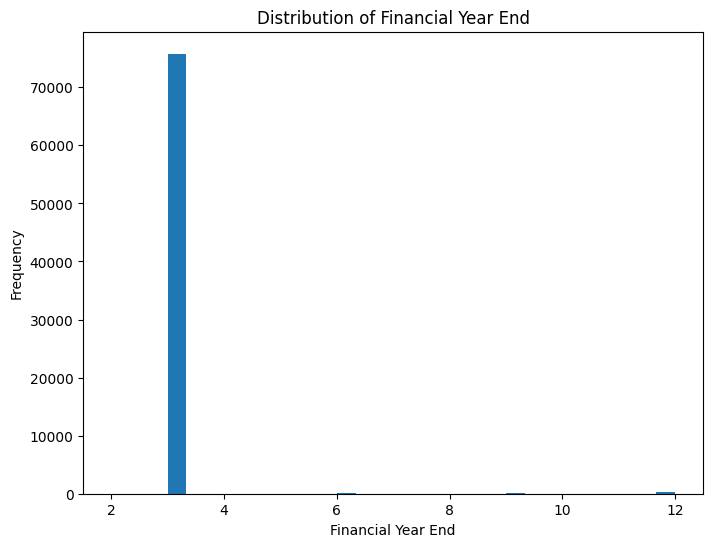

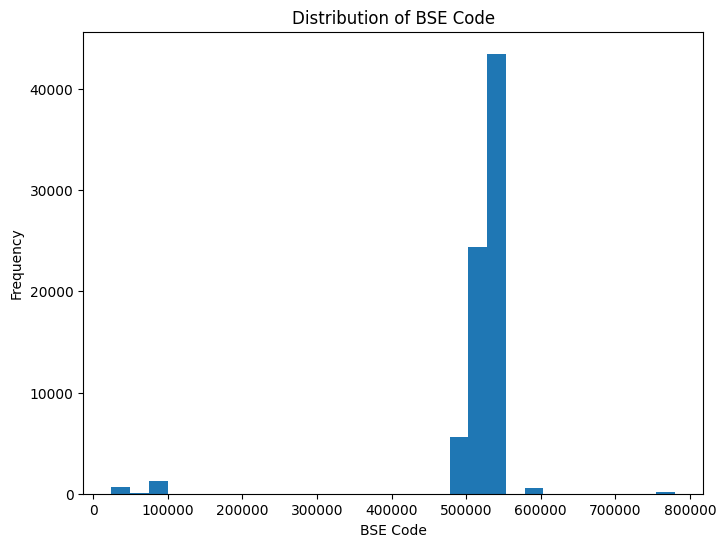

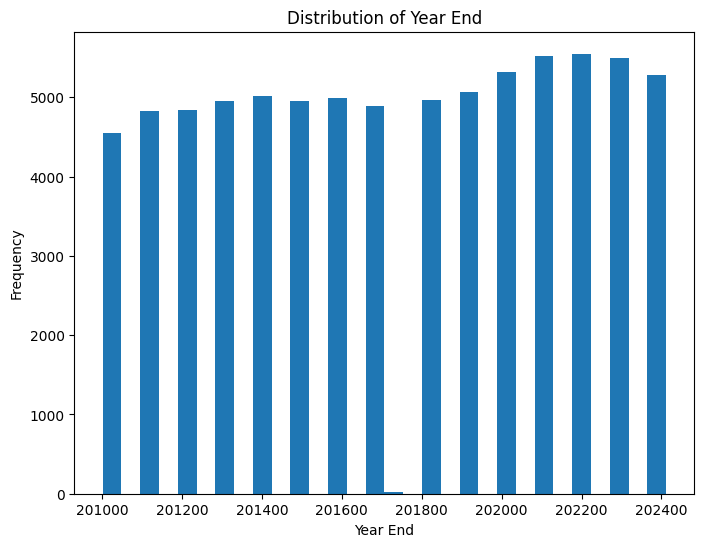

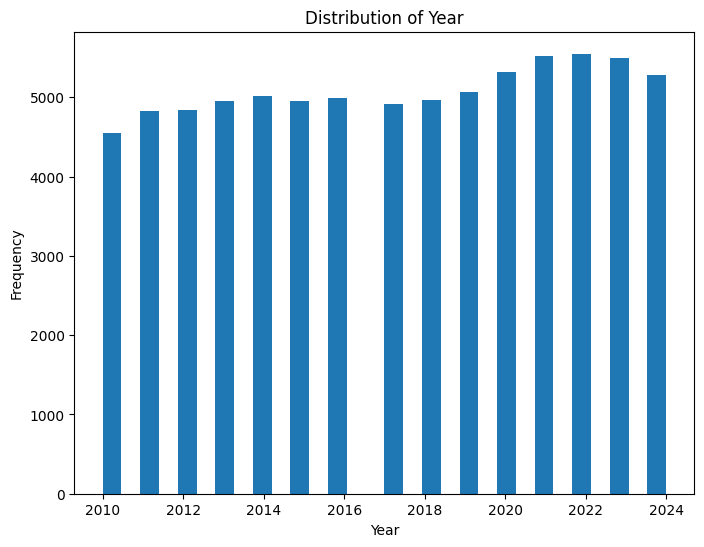

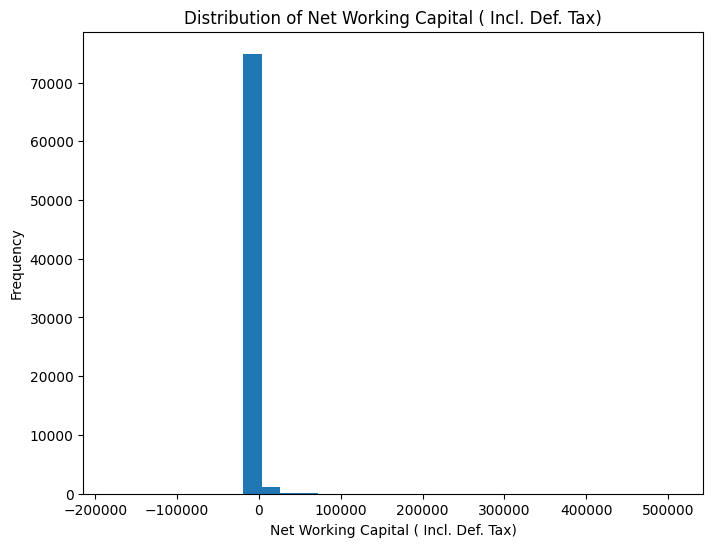

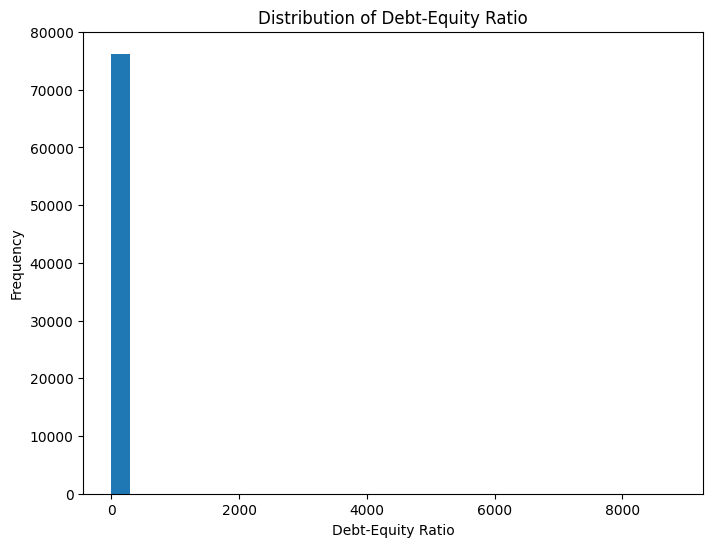

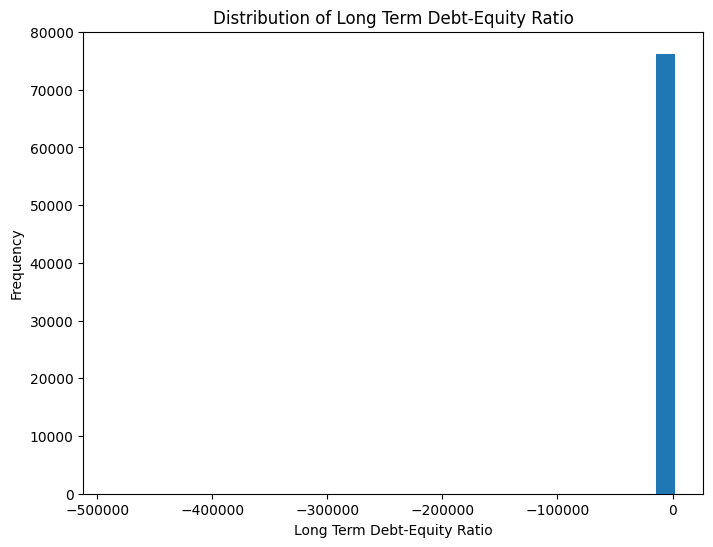

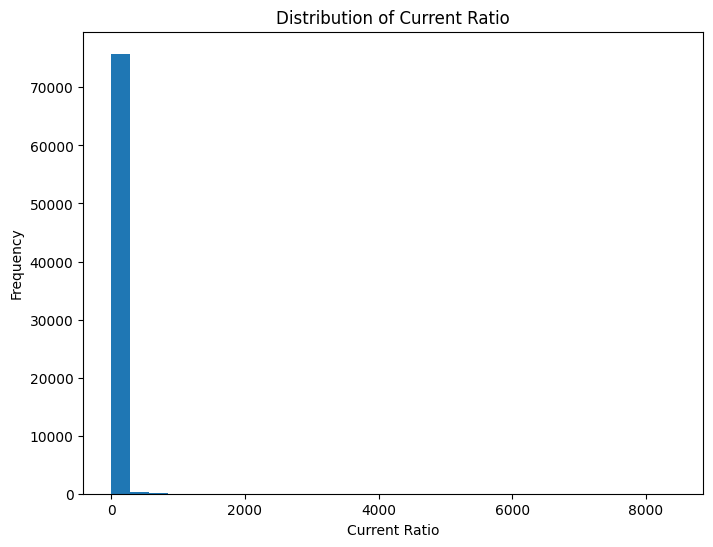

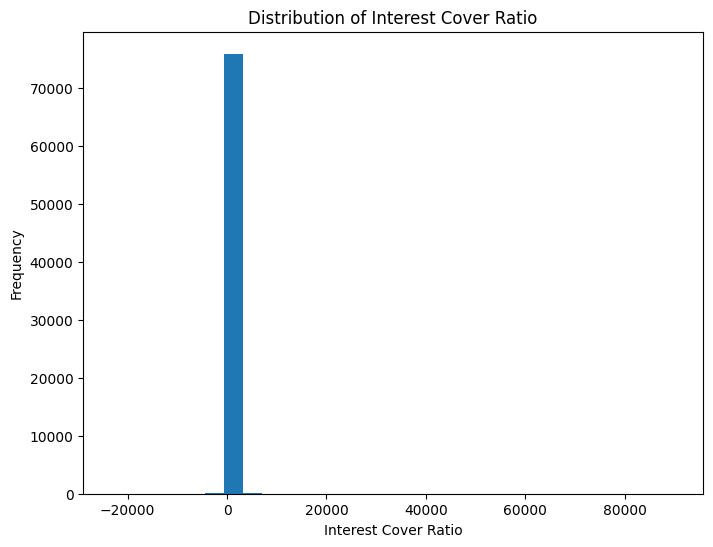

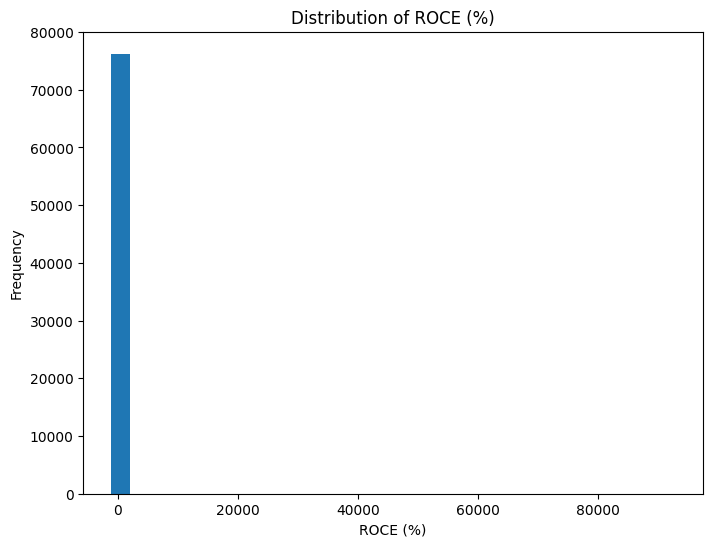

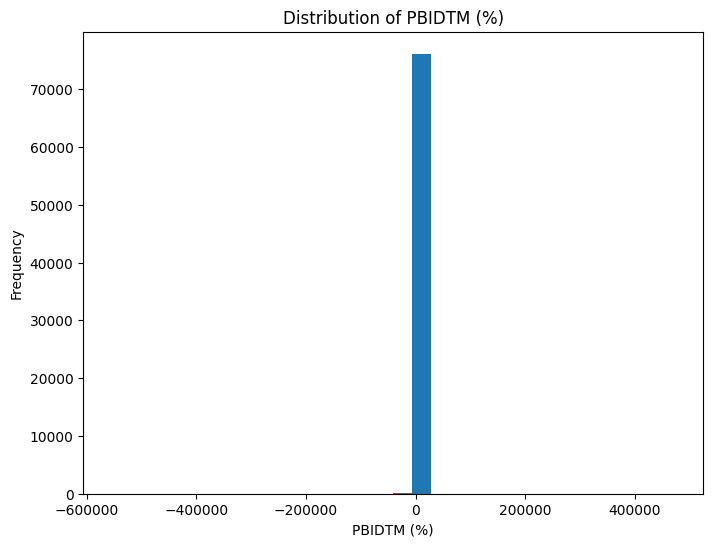

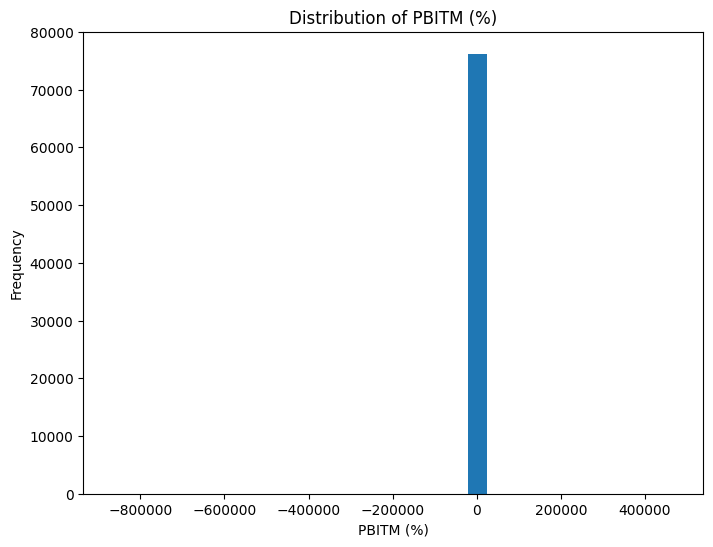

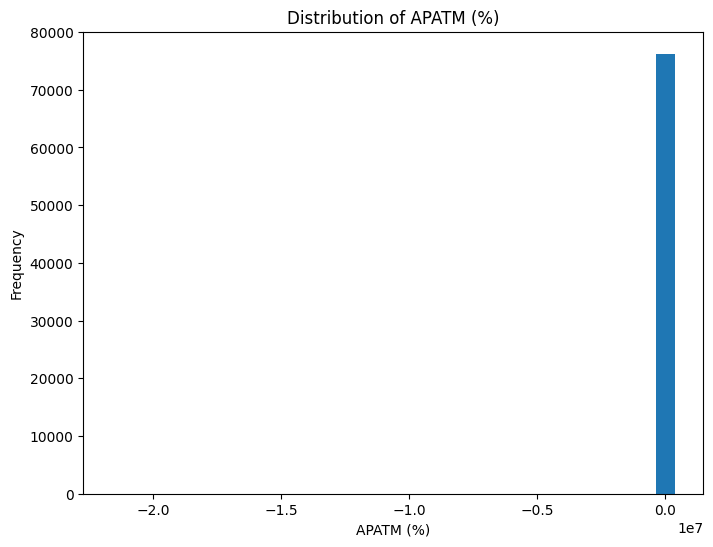

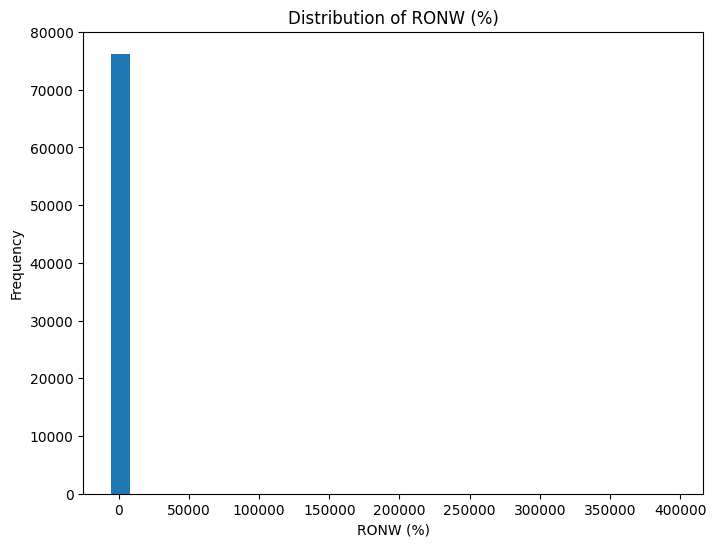

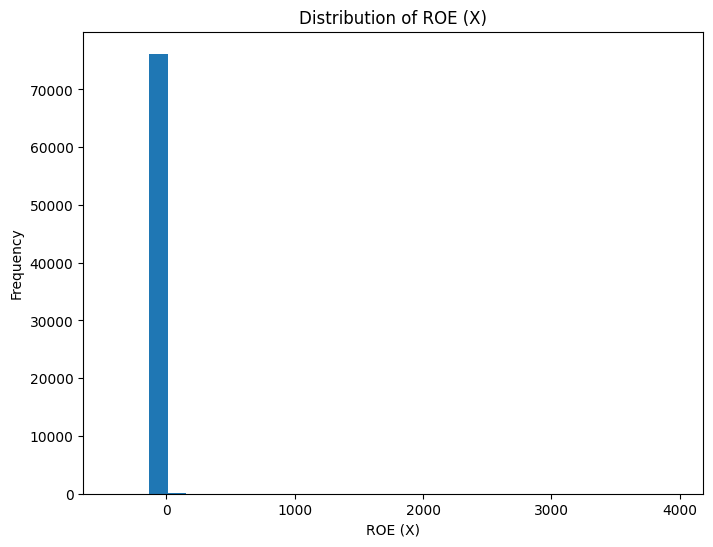

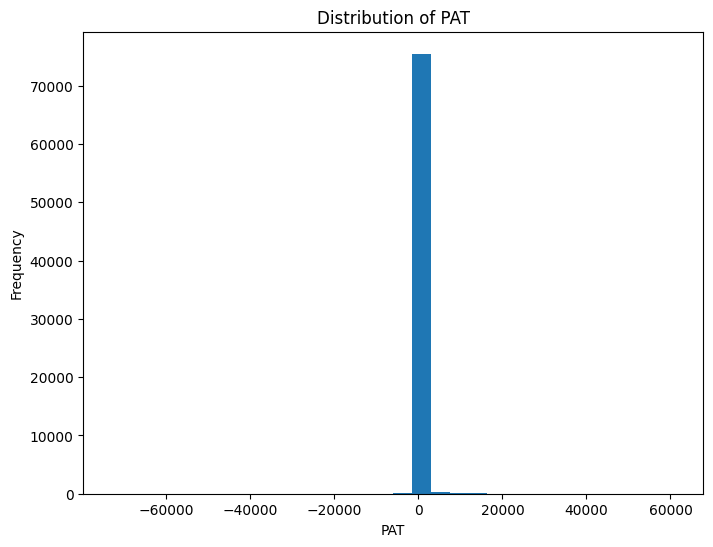

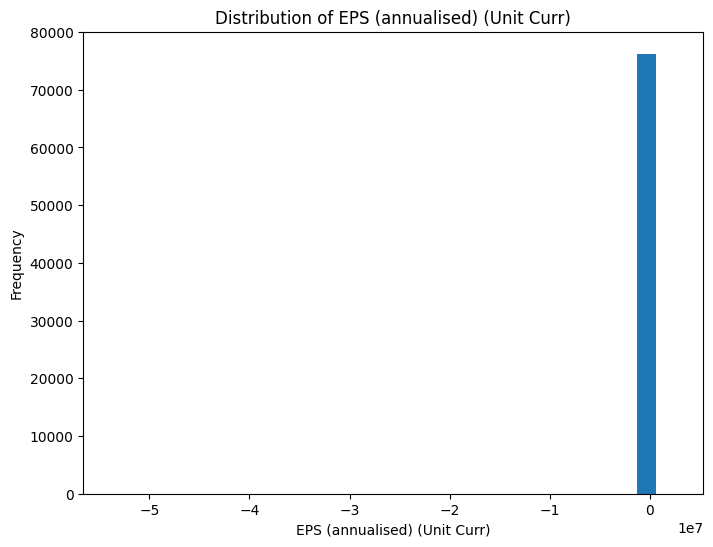

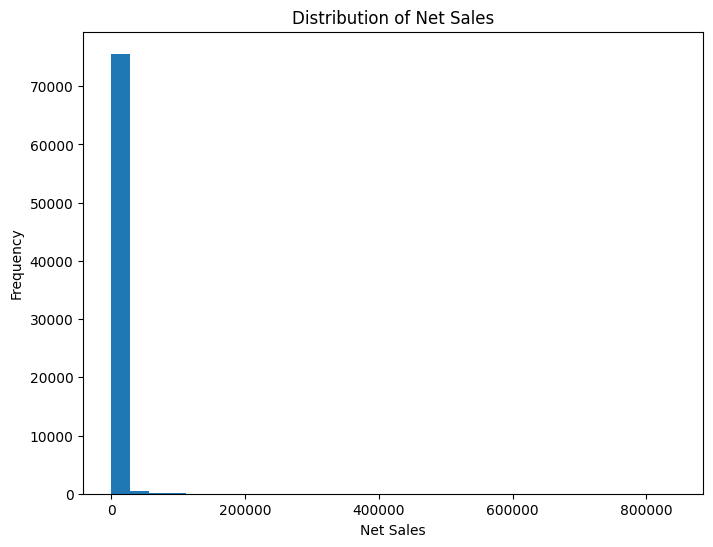

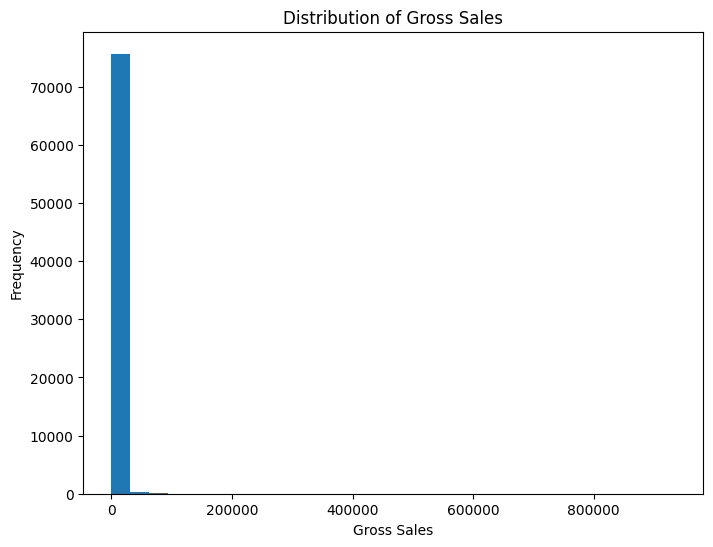

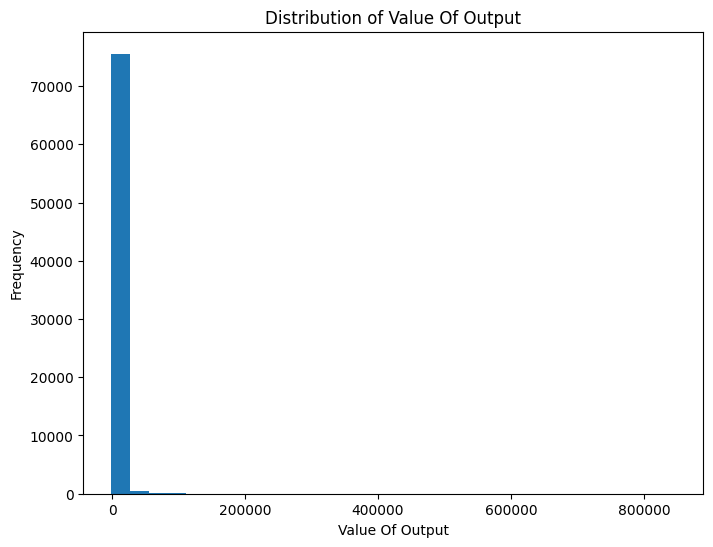

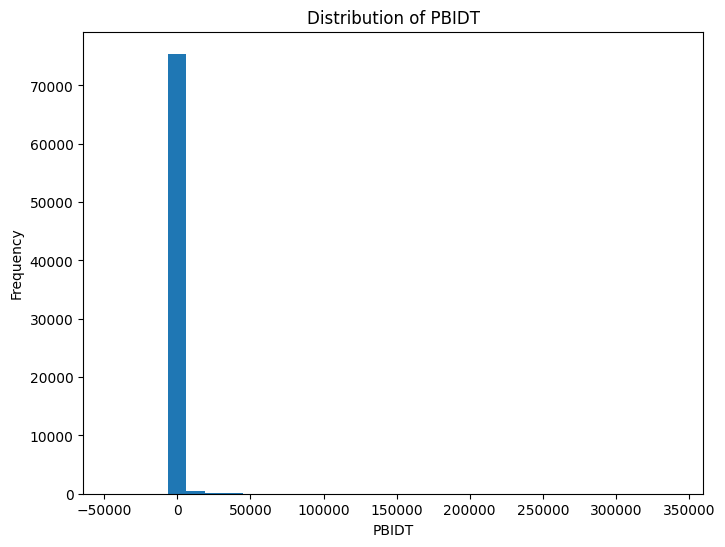

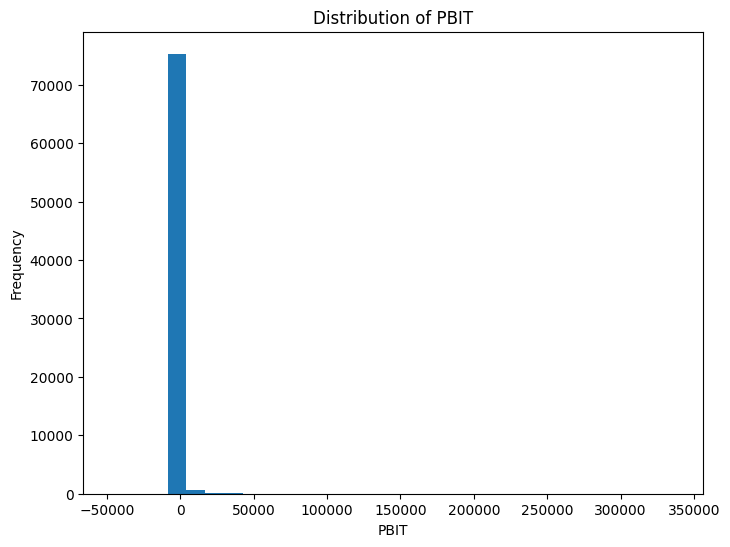

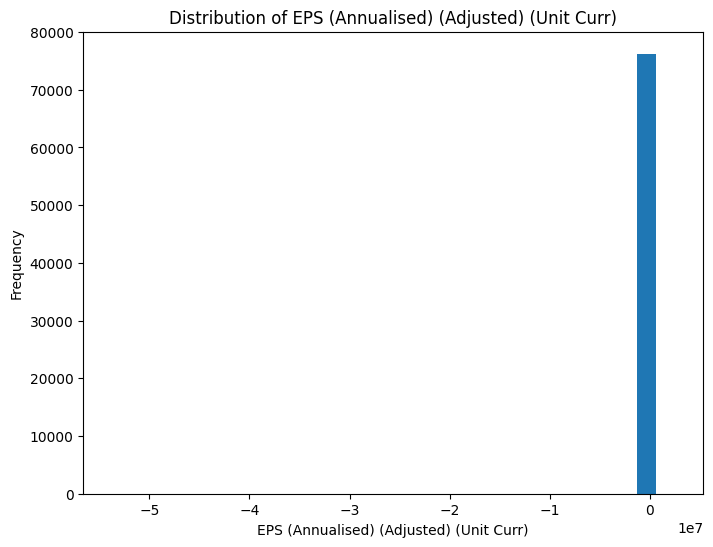

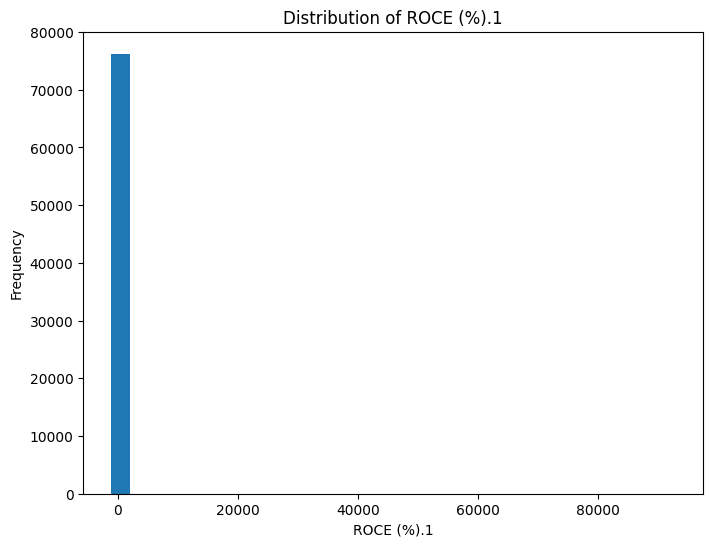

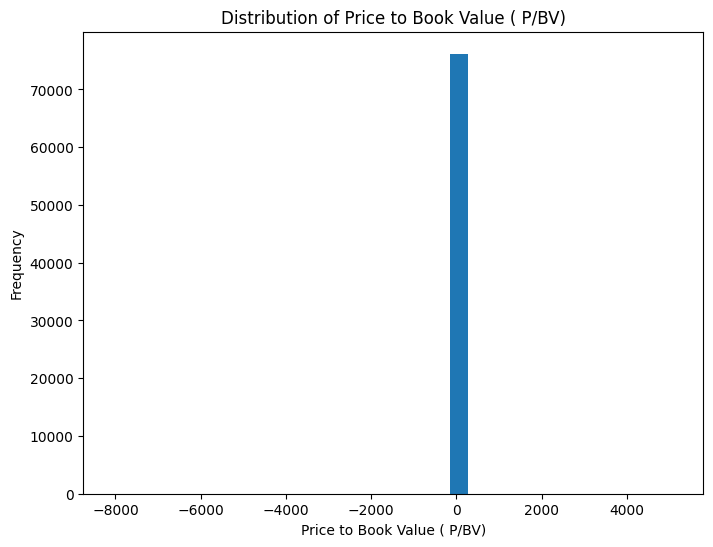

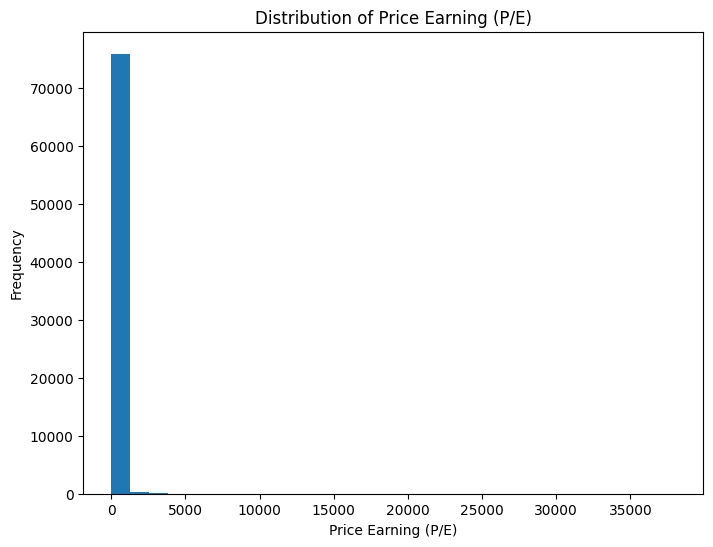

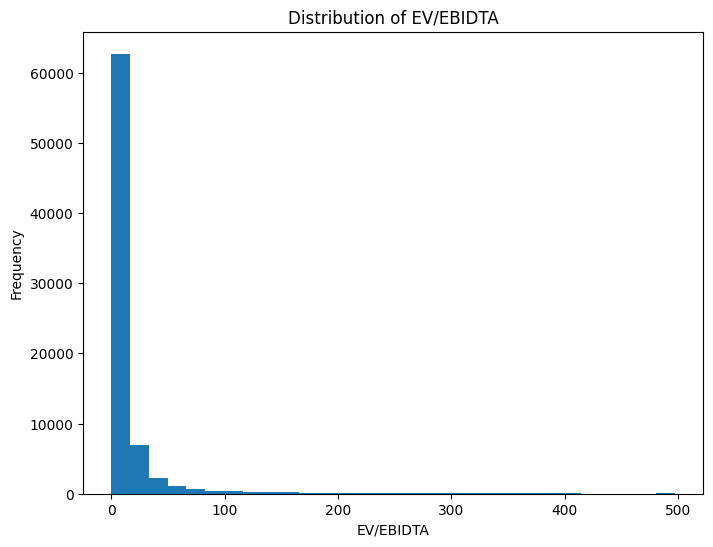

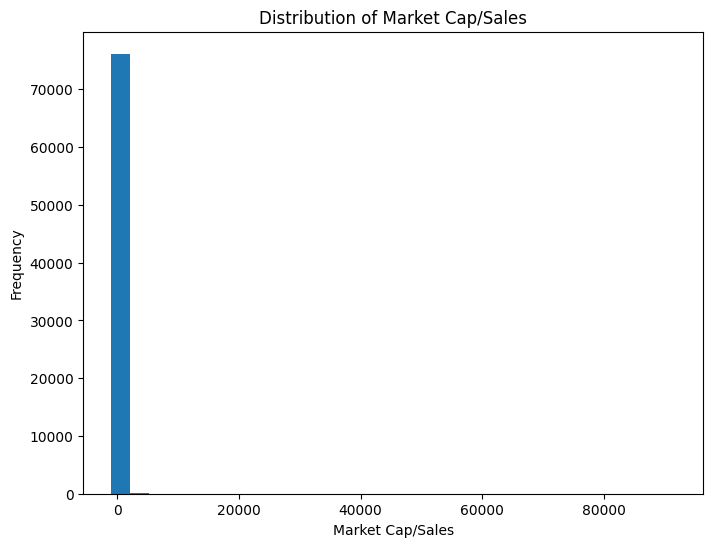

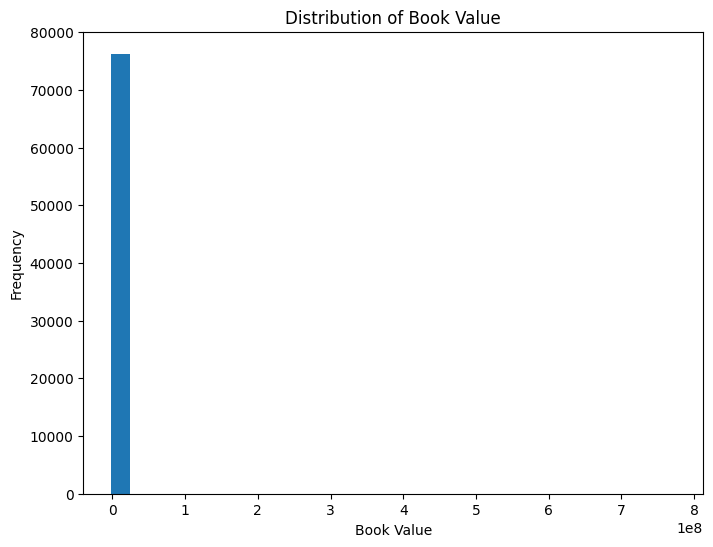

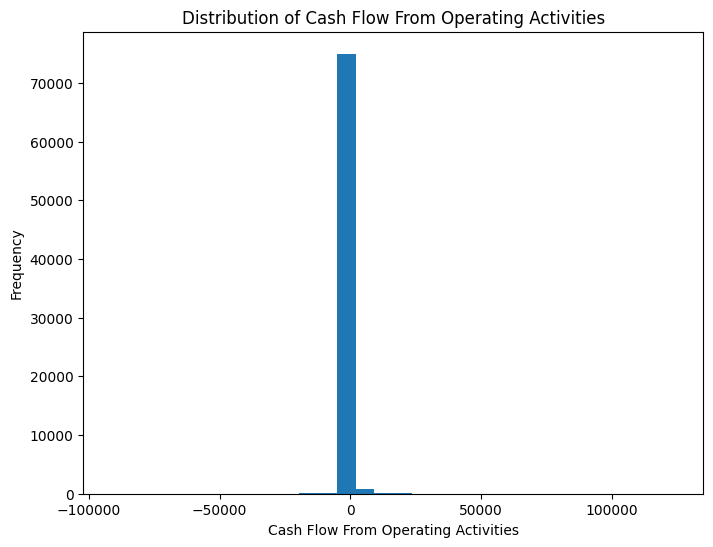

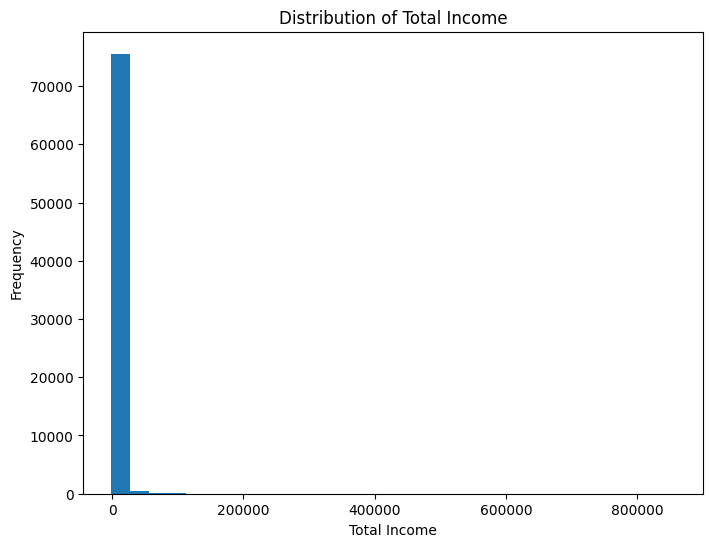

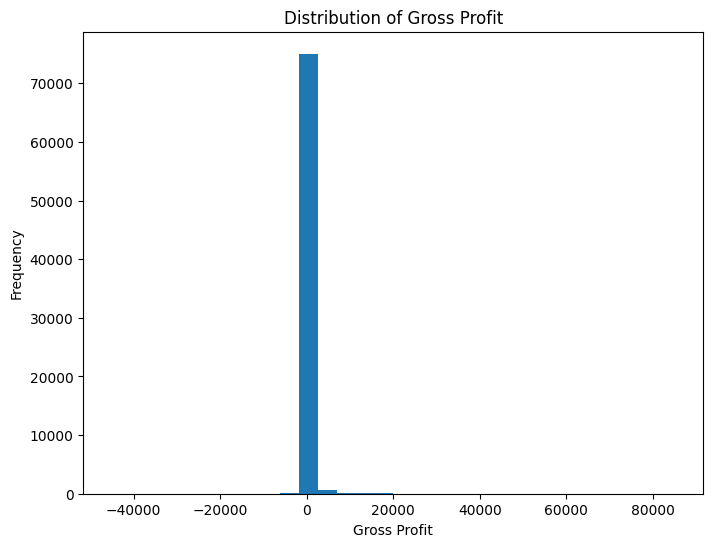

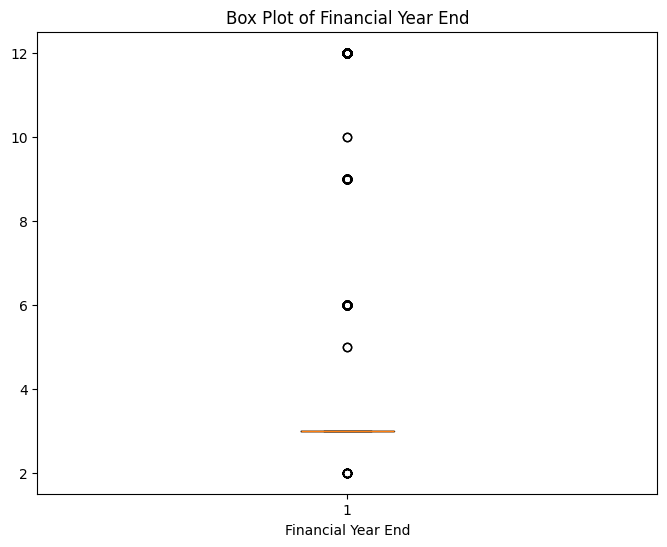

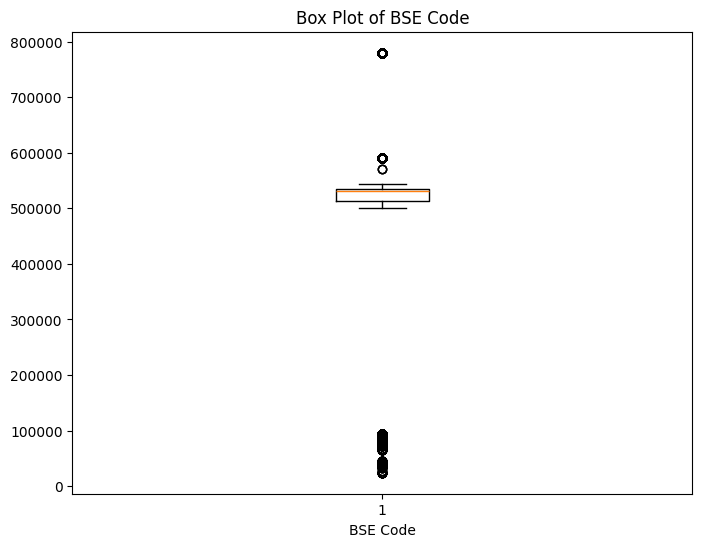

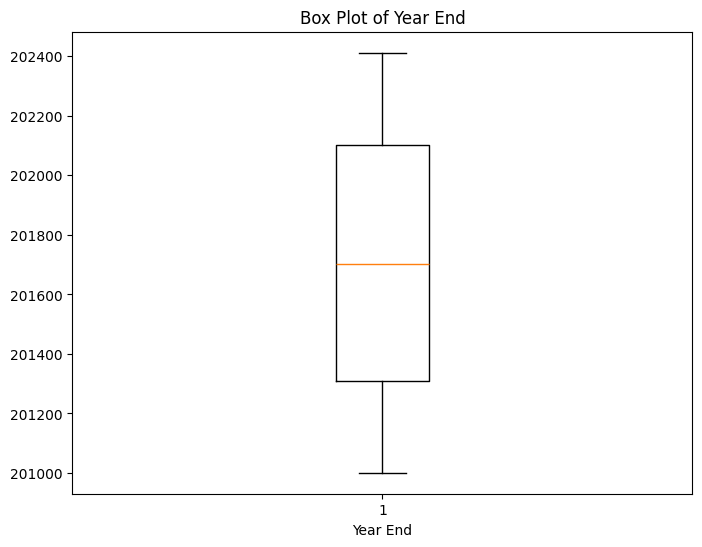

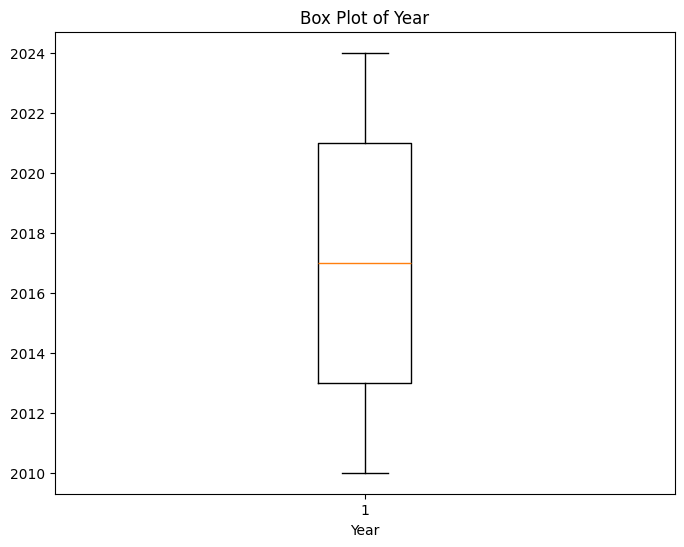

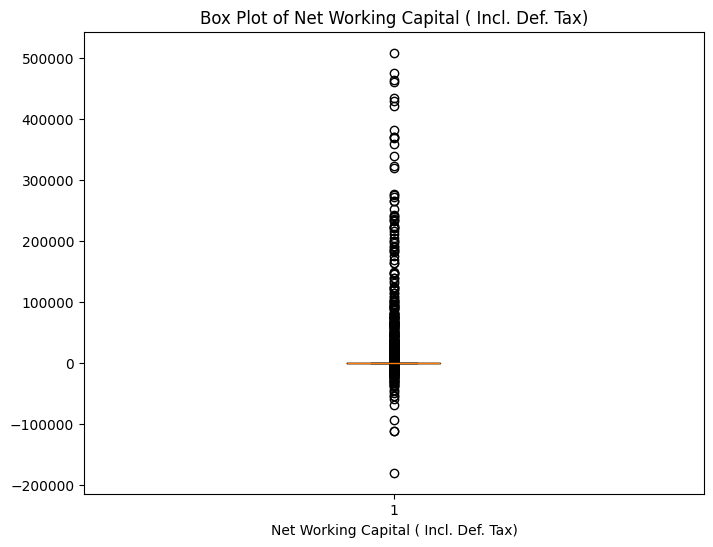

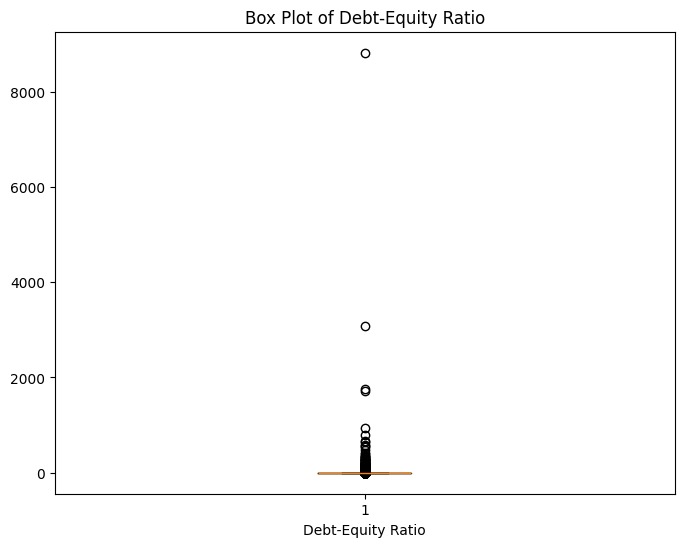

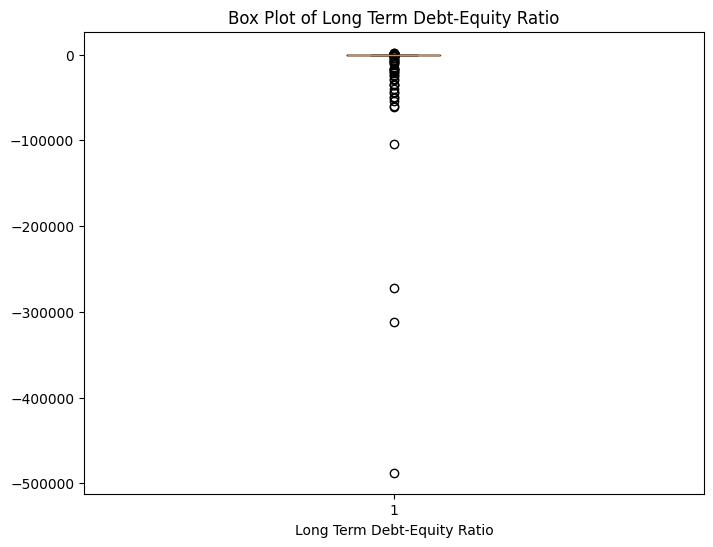

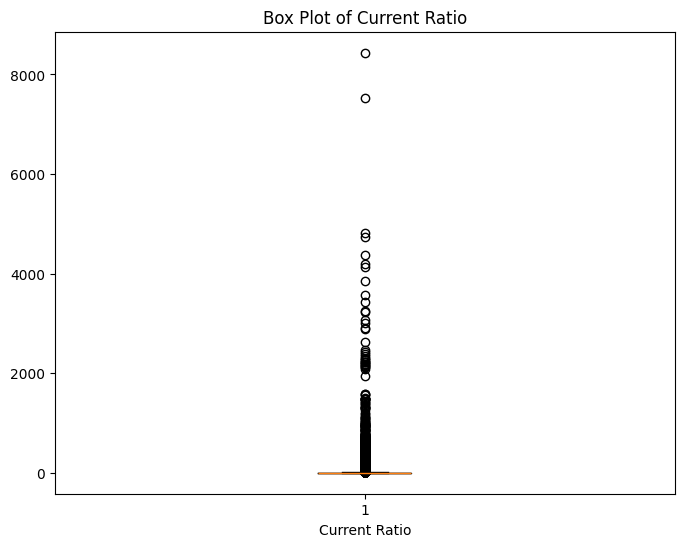

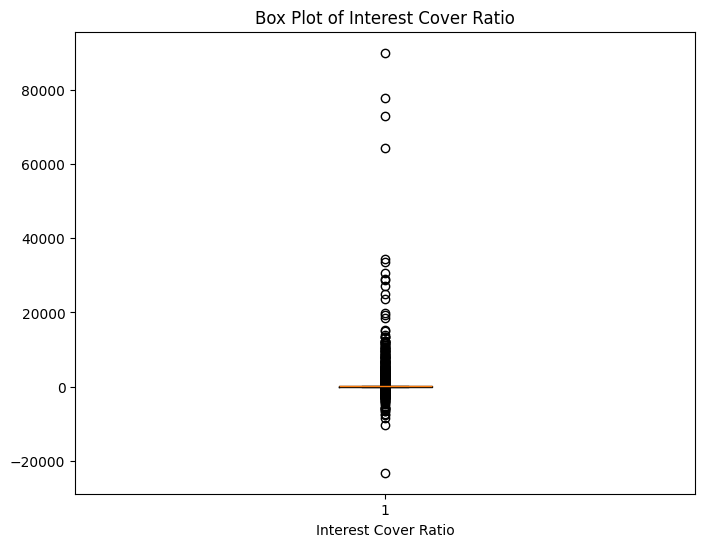

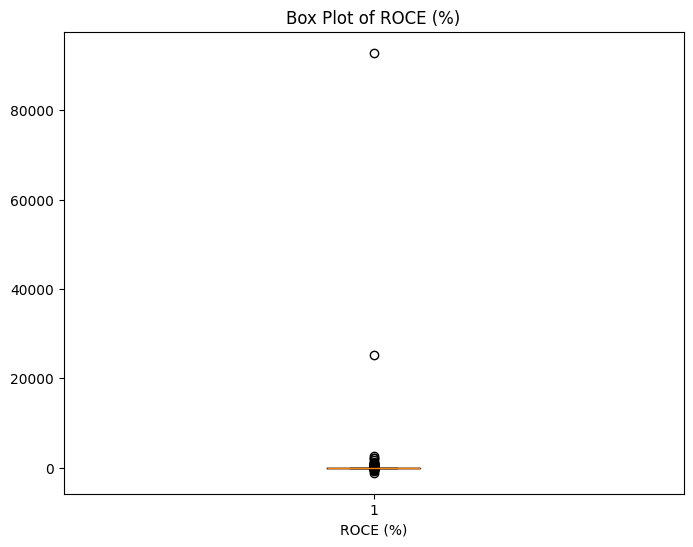

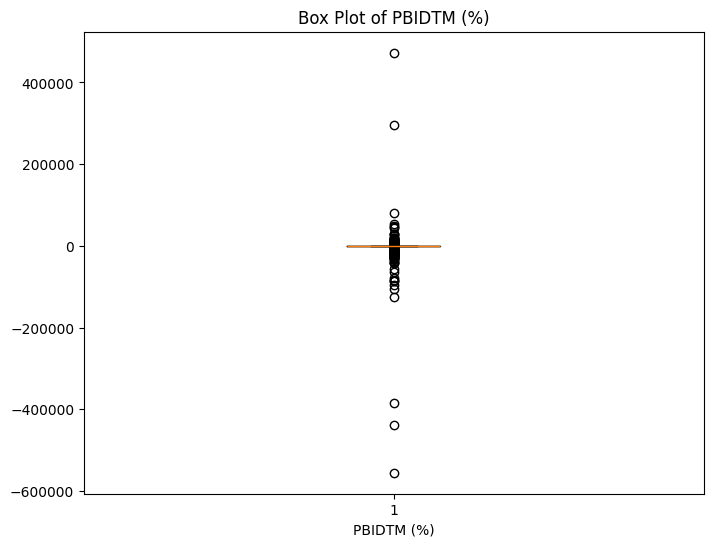

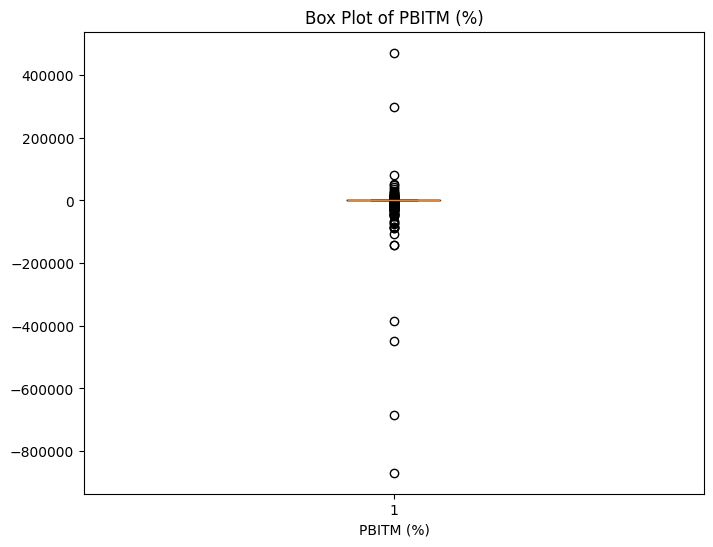

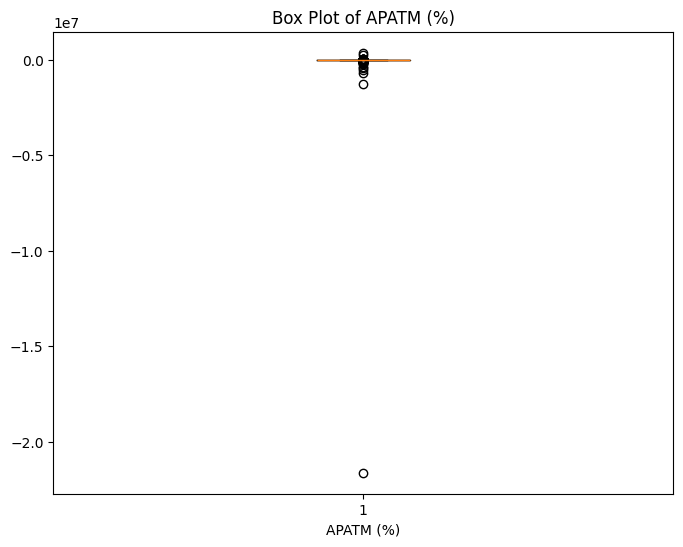

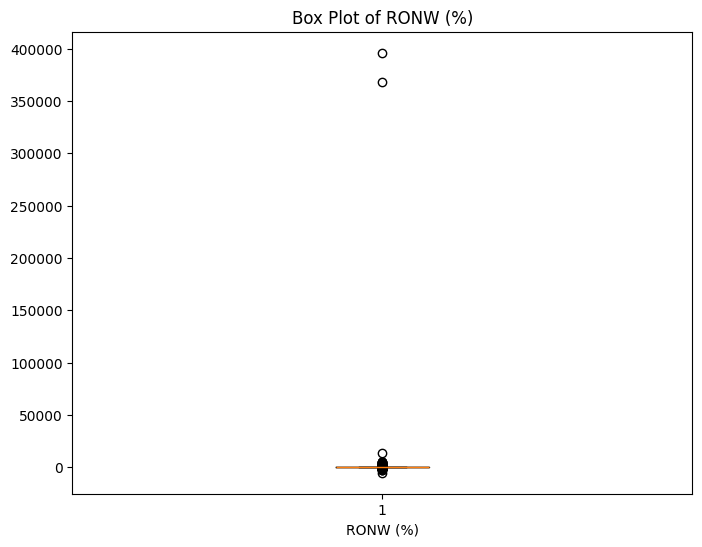

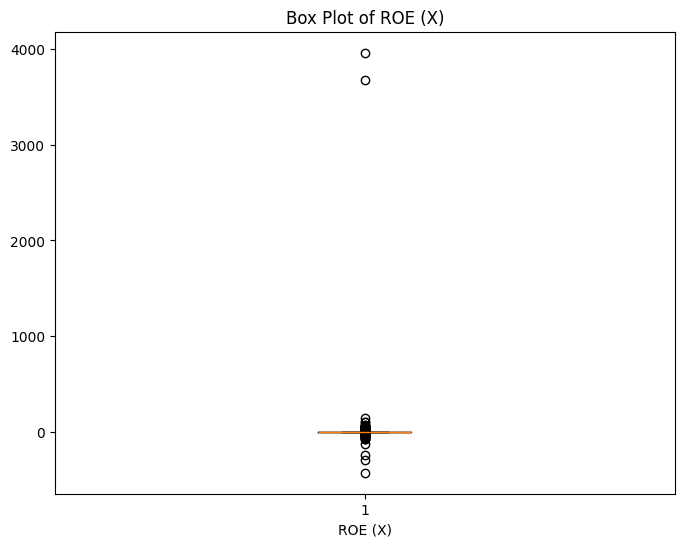

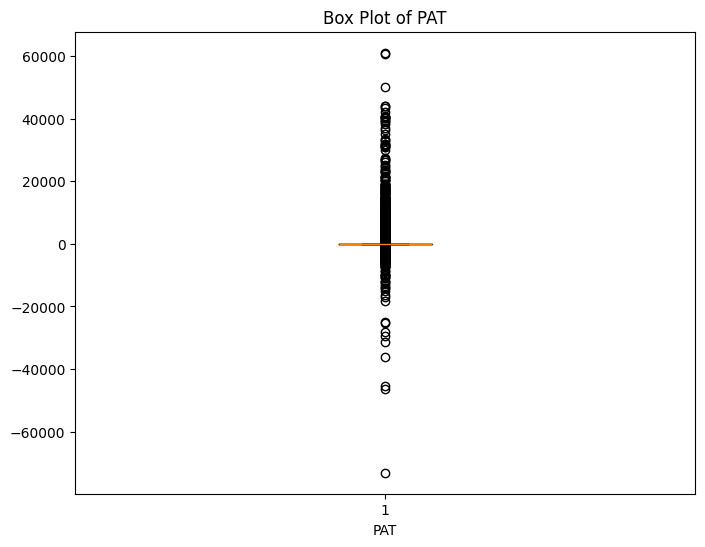

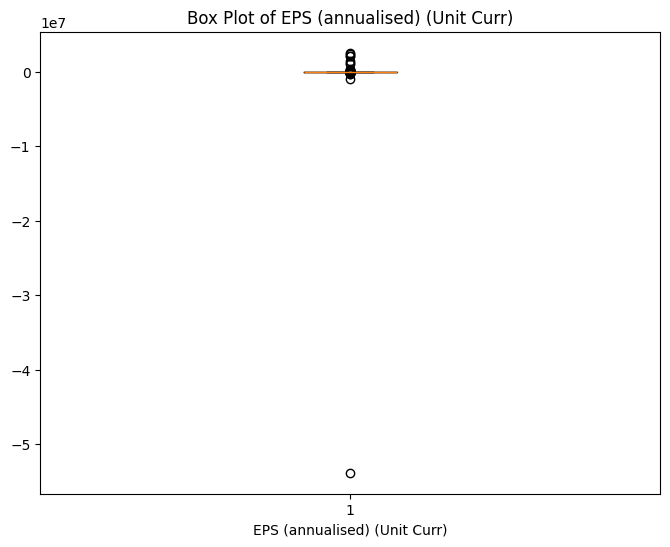

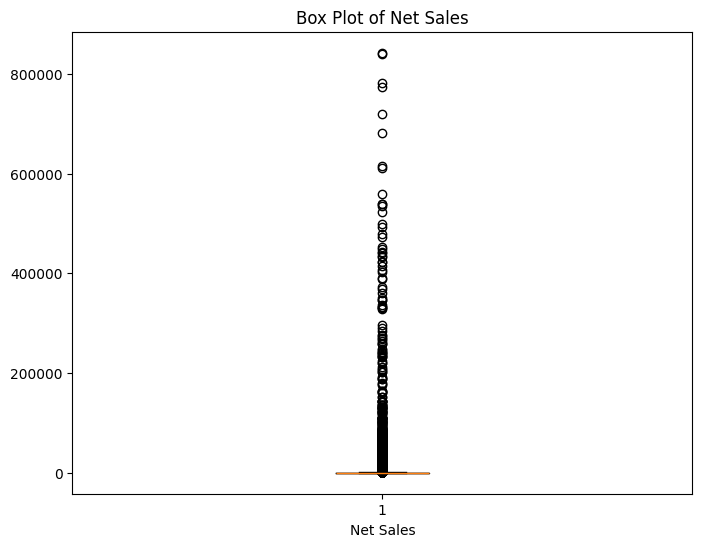

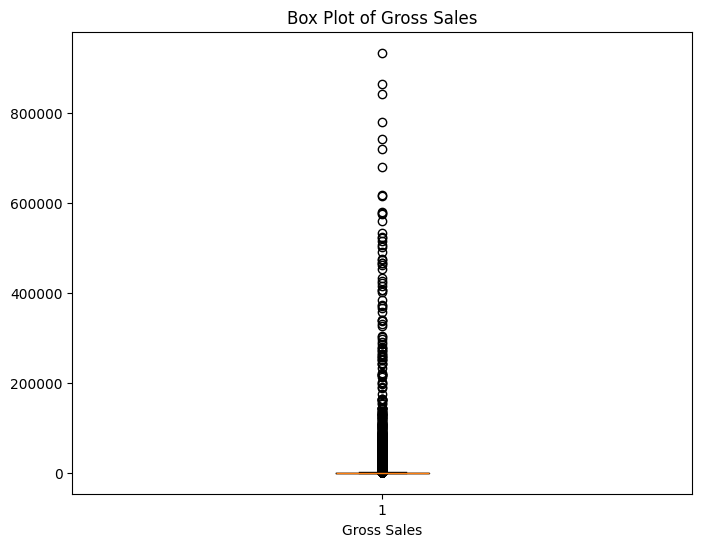

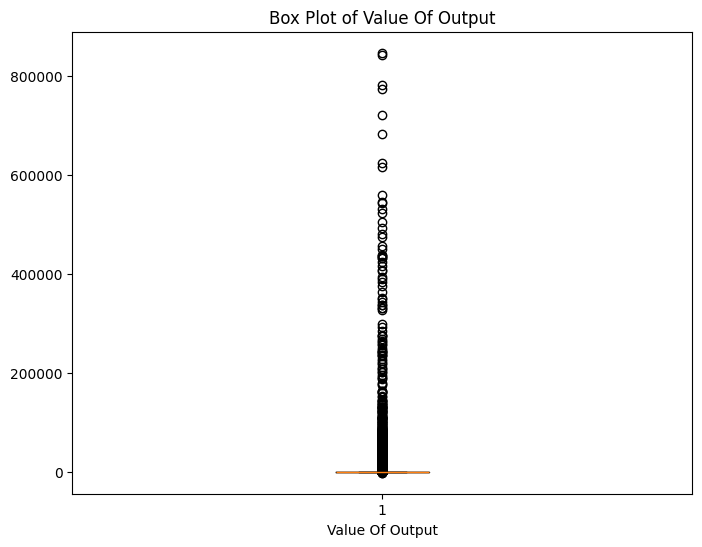

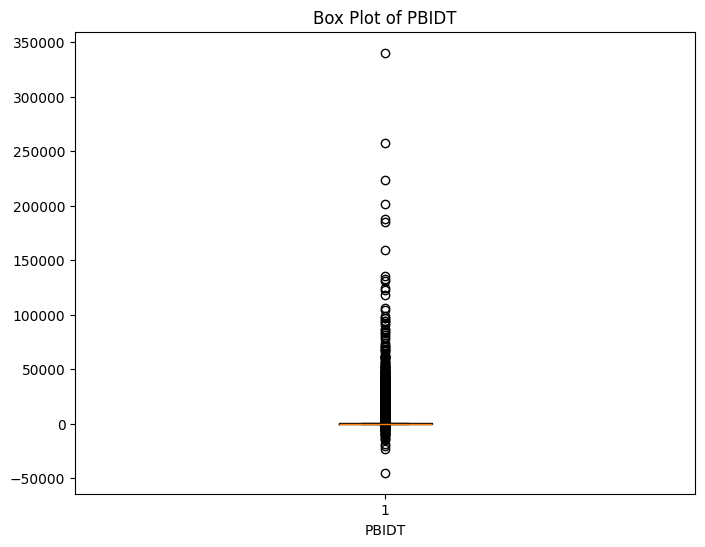

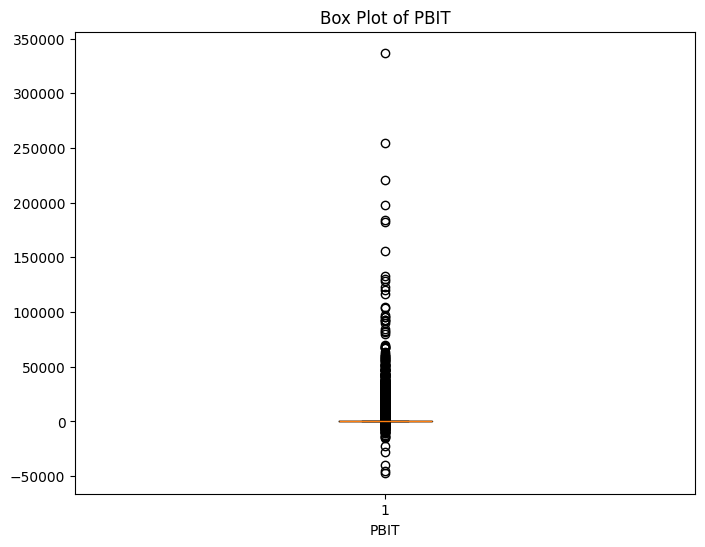

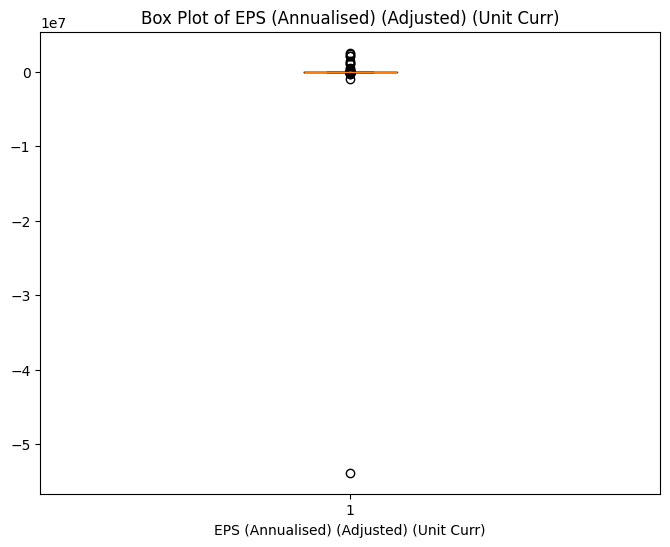

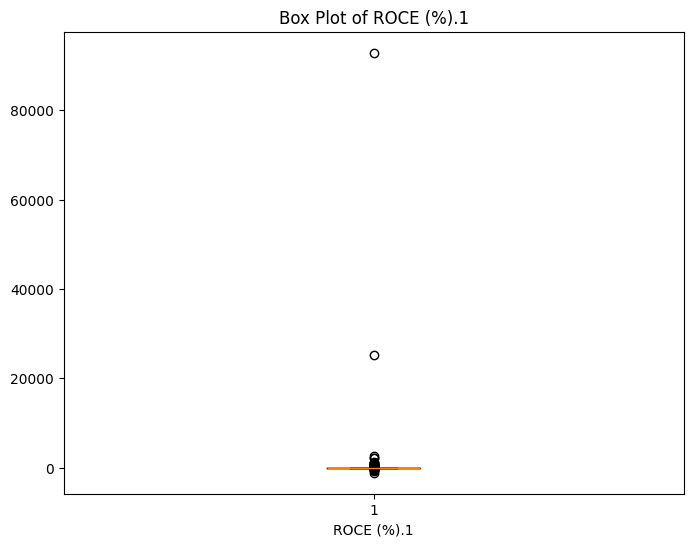

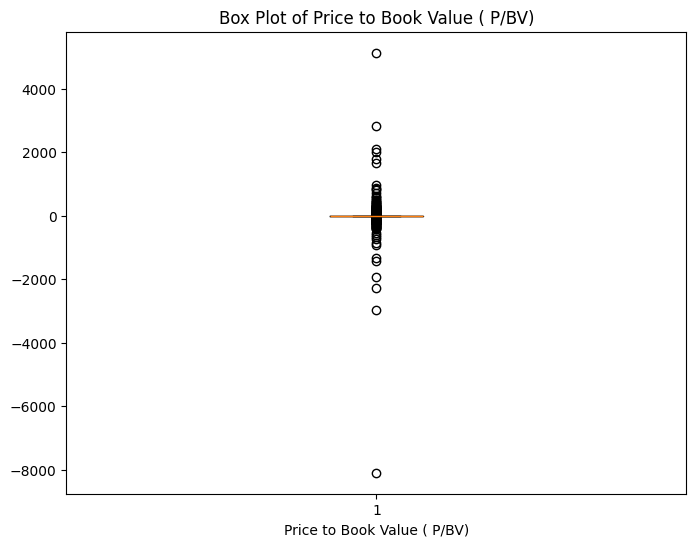

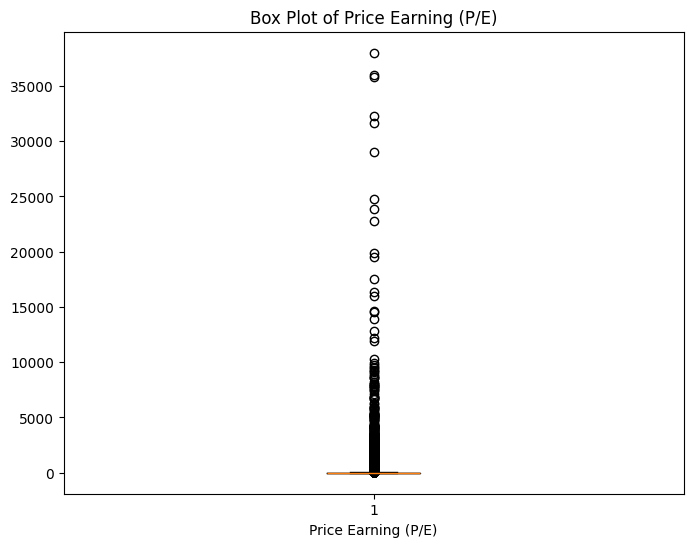

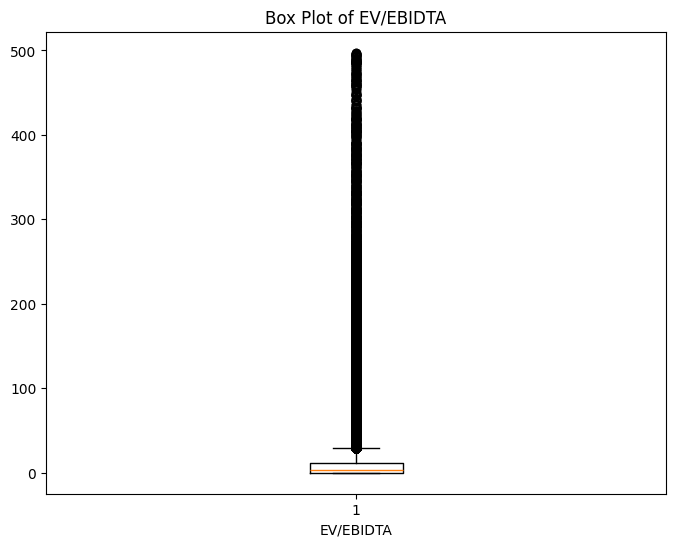

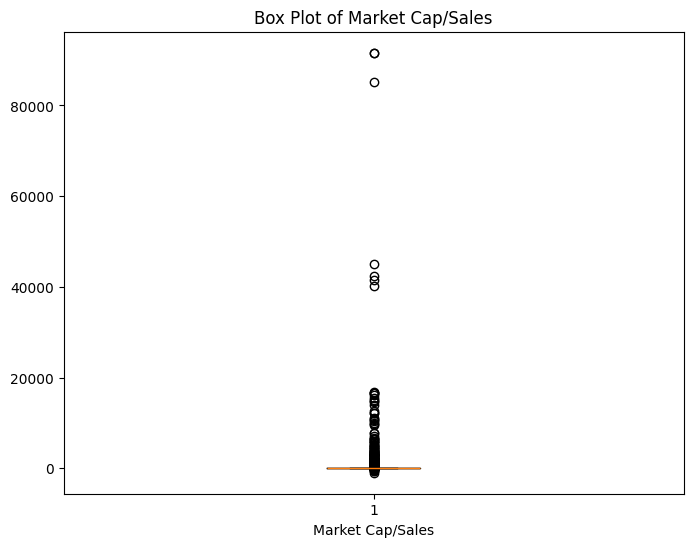

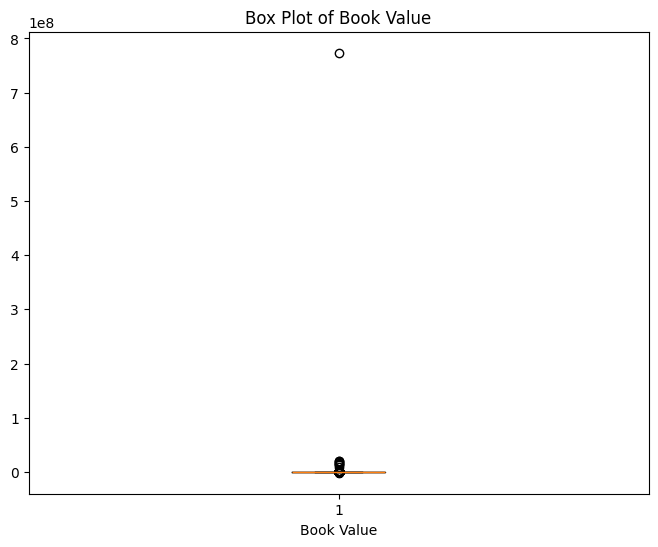

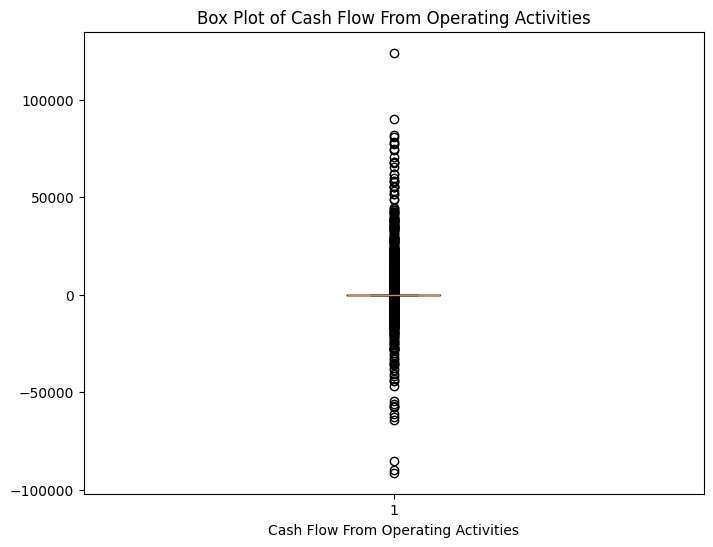

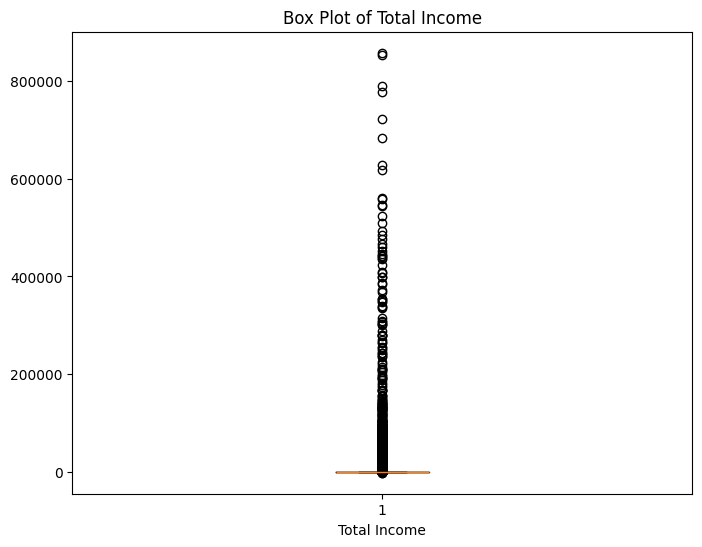

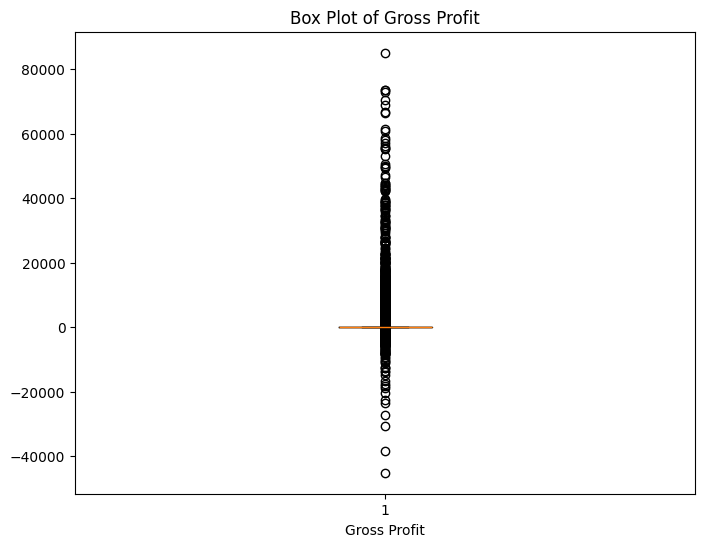

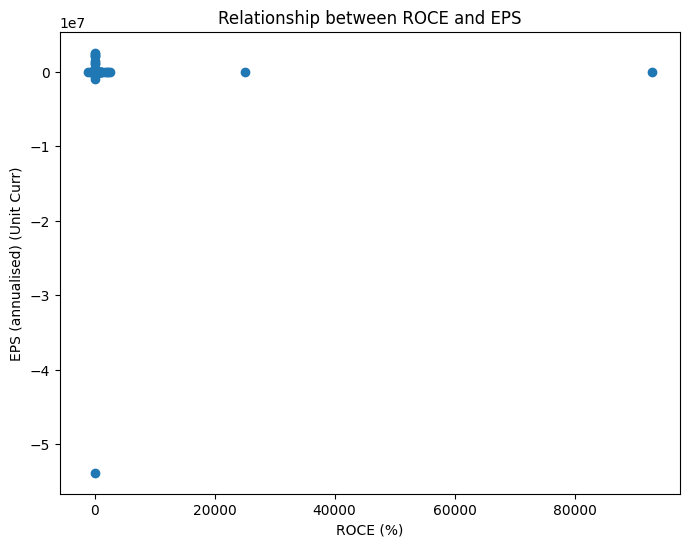

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=30)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {col}")
  plt.show()

# Create box plots for numerical features
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[col].dropna())
  plt.xlabel(col)
  plt.title(f"Box Plot of {col}")
  plt.show()

# Create scatter plots for pairs of features
# Here, we can choose specific pairs of features to visualize based on the business problem
# For example, we can visualize the relationship between 'ROCE (%)' and 'EPS (annualised) (Unit Curr)'
plt.figure(figsize=(8, 6))
plt.scatter(df['ROCE (%)'], df['EPS (annualised) (Unit Curr)'])
plt.xlabel('ROCE (%)')
plt.ylabel('EPS (annualised) (Unit Curr)')
plt.title('Relationship between ROCE and EPS')
plt.show()


**Reasoning**:
The previous code block failed due to the presence of non-numerical values in the dataframe. We need to select only numerical columns for the correlation matrix calculation.



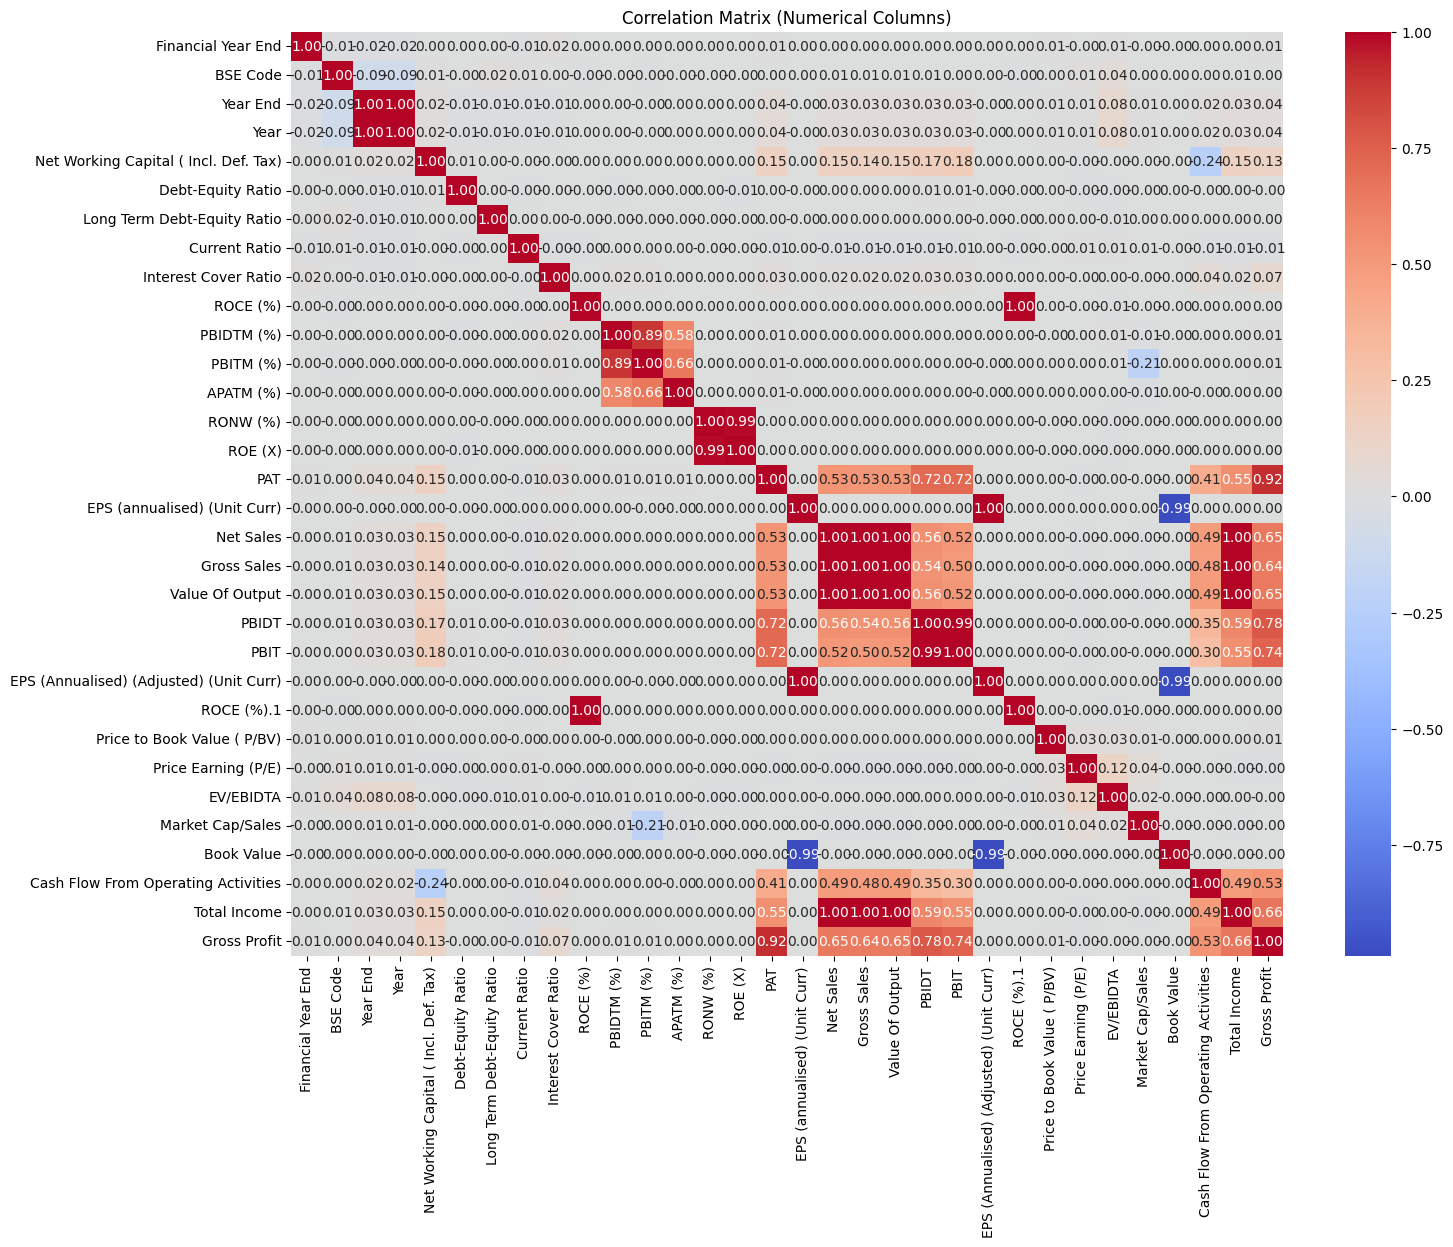

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Columns)")
plt.show()

**Reasoning**:
Split the data into training and testing sets using `train_test_split` from `sklearn.model_selection`.



In [ ]:
df.to_csv('processed_data.csv', index=False)  # Save without the index


In [ ]:
print("\nNumber of missing values in each column:\n", df.isnull().sum())


Number of missing values in each column:
 Capitaline Code                            0
Company Name                               0
Sector                                     0
Industry                                   0
Financial Year End                         0
NSE Symbol                                 0
BSE Code                                   0
Listing Status(MCX)                        0
Company Type                               0
Year End                                   0
Year                                       0
Net Working Capital ( Incl. Def. Tax)      0
Debt-Equity Ratio                          0
Long Term Debt-Equity Ratio                0
Current Ratio                              0
Interest Cover Ratio                       0
ROCE (%)                                   0
PBIDTM (%)                                 0
PBITM (%)                                  0
APATM (%)                                  0
RONW (%)                                   0
ROE (X)     

In [ ]:
import pandas as pd

df = pd.read_excel('/content/processed_data.xlsx')

# Get a list of unique companies
unique_companies = df['Company_Name'].unique()
filtered_companies = []

for company in unique_companies:
  company_data = df[df['Company_Name'] == company]  # Replace 'Company Name' with the actual column name

  # Check if financial data is available for all years from 2010 to 2024
  years_available = company_data['Year'].unique()  # Replace 'Financial Year' with the actual column name
  if all(year in years_available for year in range(2010, 2025)):
    filtered_companies.extend(company_data.index.tolist())  # If all years are available, append the rows to filtered list

# Create a new DataFrame with filtered companies
df_filtered = df.loc[filtered_companies]

display(df_filtered)

Capitaline Code    Company_Name                     Sector  \
0                23450      20 Microns  Mining & Mineral products   
1                23450      20 Microns  Mining & Mineral products   
2                23450      20 Microns  Mining & Mineral products   
3                23450      20 Microns  Mining & Mineral products   
4                23450      20 Microns  Mining & Mineral products   
...                ...             ...                        ...   
76248             6367  Zydus Wellness                       FMCG   
76249             6367  Zydus Wellness                       FMCG   
76250             6367  Zydus Wellness                       FMCG   
76251             6367  Zydus Wellness                       FMCG   
76252             6367  Zydus Wellness                       FMCG   

                         Industry  Financial Year End NSE Symbol  BSE Code  \
0               Mining / Minerals                   3  20MICRONS    533022   
1               Mining / Minerals                   3  20MICRONS    533022   
2               Mining / Minerals                   3  20MICRONS    533022   
3               Mining / Minerals                   3  20MICRONS    533022   
4               Mining / Minerals                   3  20MICRONS    533022   
...                           ...                 ...        ...       ...   
76248  Food - Processing - Others                   3  ZYDUSWELL    531335   
76249  Food - Processing - Others                   3  ZYDUSWELL    531335   
76250  Food - Processing - Others                   3  ZYDUSWELL    531335   
76251  Food - Processing - Others                   3  ZYDUSWELL    531335   
76252  Food - Processing - Others                   3  ZYDUSWELL    531335   

      Listing Status(MCX) Company Type  Year End  ...  \
0                  Active       Public    201003  ...   
1                  Active       Public    201403  ...   
2                  Active       Public    202003  ...   
3                  Active       Public    201503  ...   
4                  Active       Public    201803  ...   
...                   ...          ...       ...  ...   
76248              Active       Public    201603  ...   
76249              Active       Public    202003  ...   
76250              Active       Public    202303  ...   
76251              Active       Public    201303  ...   
76252              Active       Public    201003  ...   

       EPS (Annualised) (Adjusted) (Unit Curr)  ROCE (%).1  \
0                                     2.465641       15.52   
1                                     0.040000        9.72   
2                                     7.080000       19.85   
3                                     0.000000        8.50   
4                                     4.500000       17.25   
...                                        ...         ...   
76248                                25.110000       23.51   
76249                                -7.060000        1.77   
76250                                10.440000        1.19   
76251                                23.830000       44.70   
76252                                11.090000       81.86   

       Price to Book Value ( P/BV)  Price Earning (P/E)  EV/EBIDTA  \
0                             1.33                 7.86       5.80   
1                             1.43               783.75       8.21   
2                             0.52                 3.63       2.96   
3                             1.75                 0.00       8.67   
4                             1.30                10.86       5.44   
...                            ...                  ...        ...   
76248                         6.07                29.60      24.80   
76249                         2.33                 0.00     101.54   
76250                         2.44               148.46     190.10   
76251                         6.61                18.22      15.25   
76252                        14.83       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_filtered.to_csv('filtered_data.csv', index=False)  # Save without the index


In [ ]:
df_filtered = pd.read_csv('/content/filtered_data.csv')

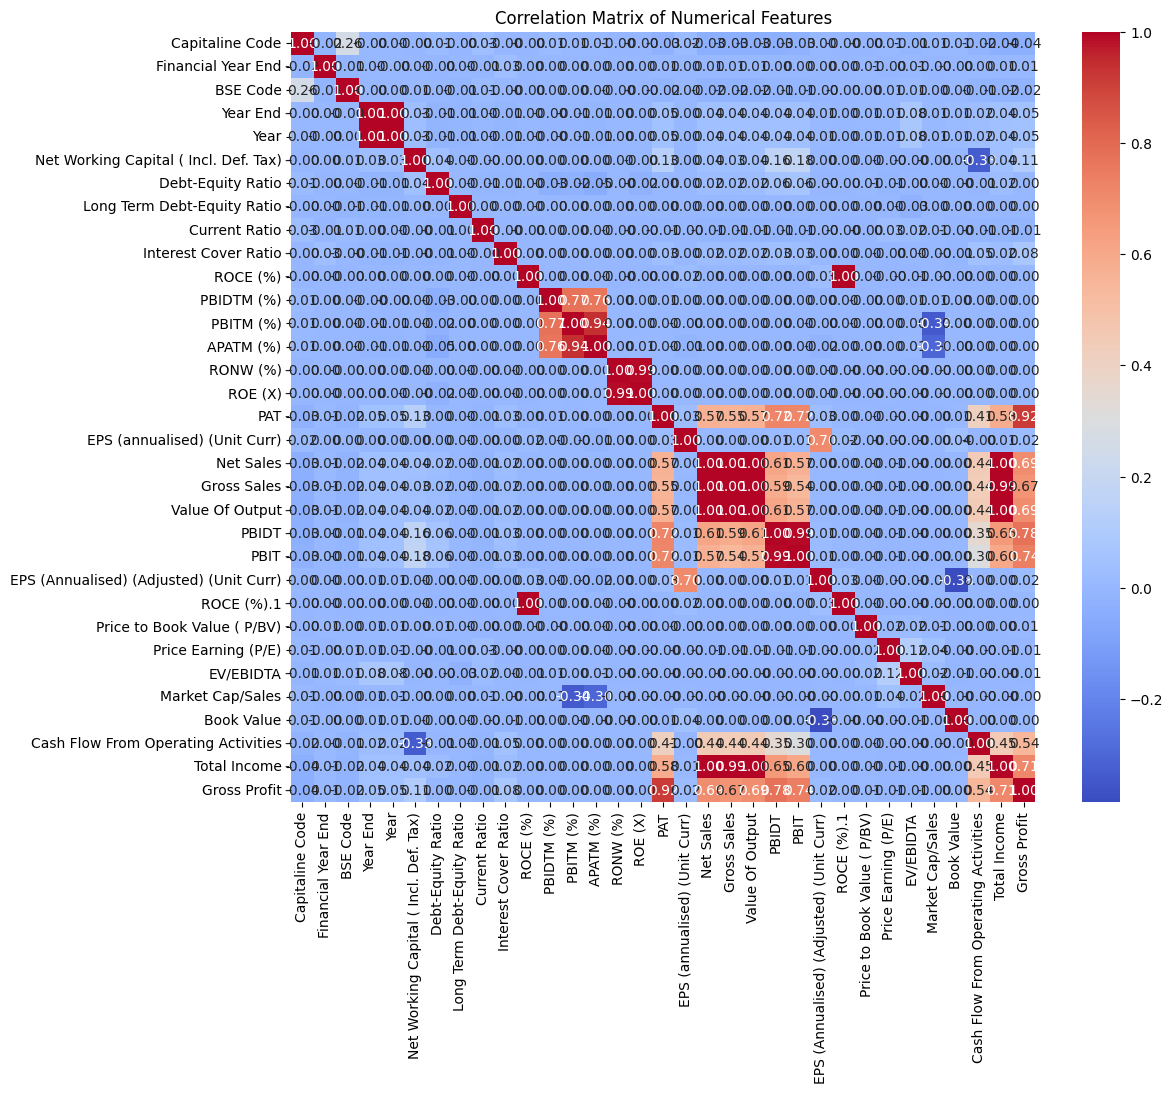

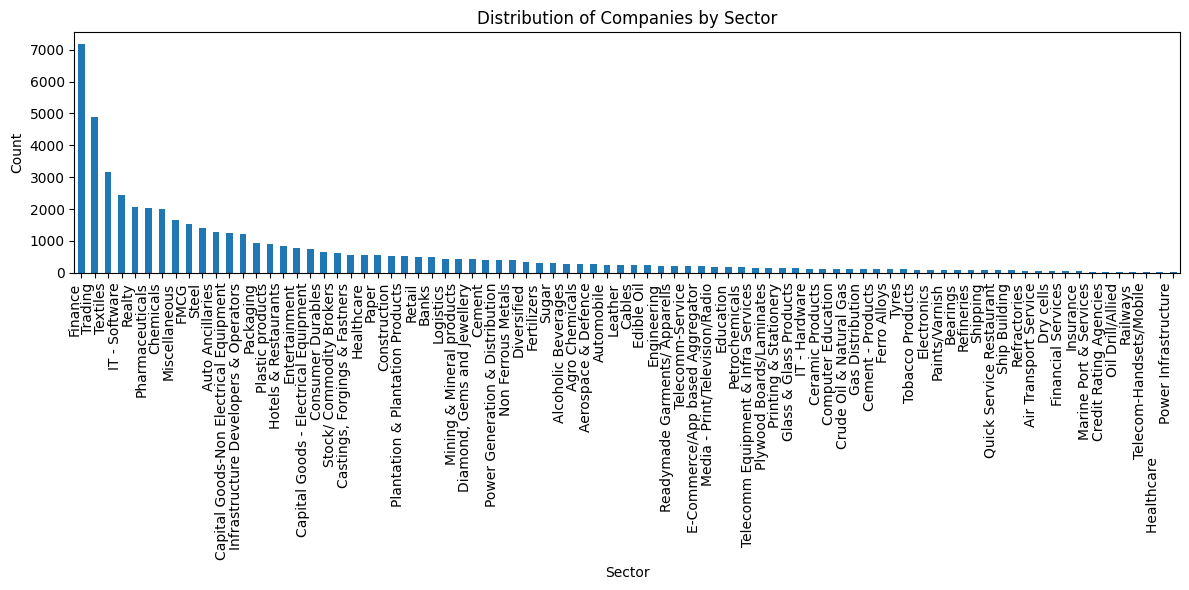

In [ ]:
import matplotlib.pyplot as plt

numerical_cols = df_filtered.select_dtypes(include=['number']).columns
corr_matrix = df_filtered[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


sector_counts = df_filtered['Sector'].value_counts()

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sector_counts.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Distribution of Companies by Sector')
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()